# Regroupement hiérarchique [Doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [296]:
# Importation du jeu de données sur le cancer du sein à partir de scikit-learn
from sklearn.datasets import load_breast_cancer

# Fonction pour diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Importation de trois algorithmes de regroupement (clustering)
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# Importation des fonctions de hiérarchie de SciPy pour visualiser des dendrogrammes
import scipy.cluster.hierarchy as sch

# Pour créer un graphe des k plus proches voisins, utile pour certains algorithmes
from sklearn.neighbors import kneighbors_graph

# Pour normaliser les données (centrer et réduire)
from sklearn.preprocessing import StandardScaler

# Importation d'autres modules de clustering et de génération de jeux de données artificiels
from sklearn import cluster, datasets, mixture

# Utilisé pour itérer en boucle sur des couleurs ou des labels de manière cyclique
from itertools import cycle, islice

# Pour tracer les résultats (graphique)
import matplotlib.pyplot as plt

# Pour mesurer le temps d'exécution
import time

# Pour ignorer certains avertissements
import warnings

# Importation de la bibliothèque NumPy pour les opérations mathématiques sur les tableaux
import numpy as np

# Génère un jeu de données artificiel en forme de "blobs" (groupes de points)
from sklearn.datasets import make_blobs

In [297]:
# Chargement de la base de données "Breast Cancer" intégrée à Scikit-learn
BreastData = load_breast_cancer()

# Extraction des caractéristiques (features) dans la variable X
X = BreastData.data

# Extraction des étiquettes (target) dans la variable y
y = BreastData.target

In [298]:
# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [299]:
# Affiche la forme (dimensions) de la variable X_train
print('X_train shape est ' , X_train.shape)

# Affiche la forme de la variable X_test
print('X_test shape est ' , X_test.shape)

# Affiche la forme de la variable y_train
print('y_train shape est ' , y_train.shape)

# Affiche la forme de la variable y_test
print('y_test shape est ' , y_test.shape)

X_train shape est  (381, 30)
X_test shape est  (188, 30)
y_train shape est  (381,)
y_test shape est  (188,)


In [300]:
# Création d'un modèle de regroupement hiérarchique agglomératif (Agglomerative Clustering)
AggClusteringModel = AgglomerativeClustering(n_clusters=2,metric='euclidean', linkage='average')

In [301]:
# Applique l’algorithme de regroupement hiérarchique (agglomératif) sur les données d’entraînement
# et prédit à quel groupe (cluster) appartient chaque échantillon de X_train
y_pred_train = AggClusteringModel.fit_predict(X_train)

# Entraîne à nouveau le modèle de clustering agglomératif sur X_test et assigne un cluster à chaque échantillon
y_pred_test = AggClusteringModel.fit_predict(X_test)

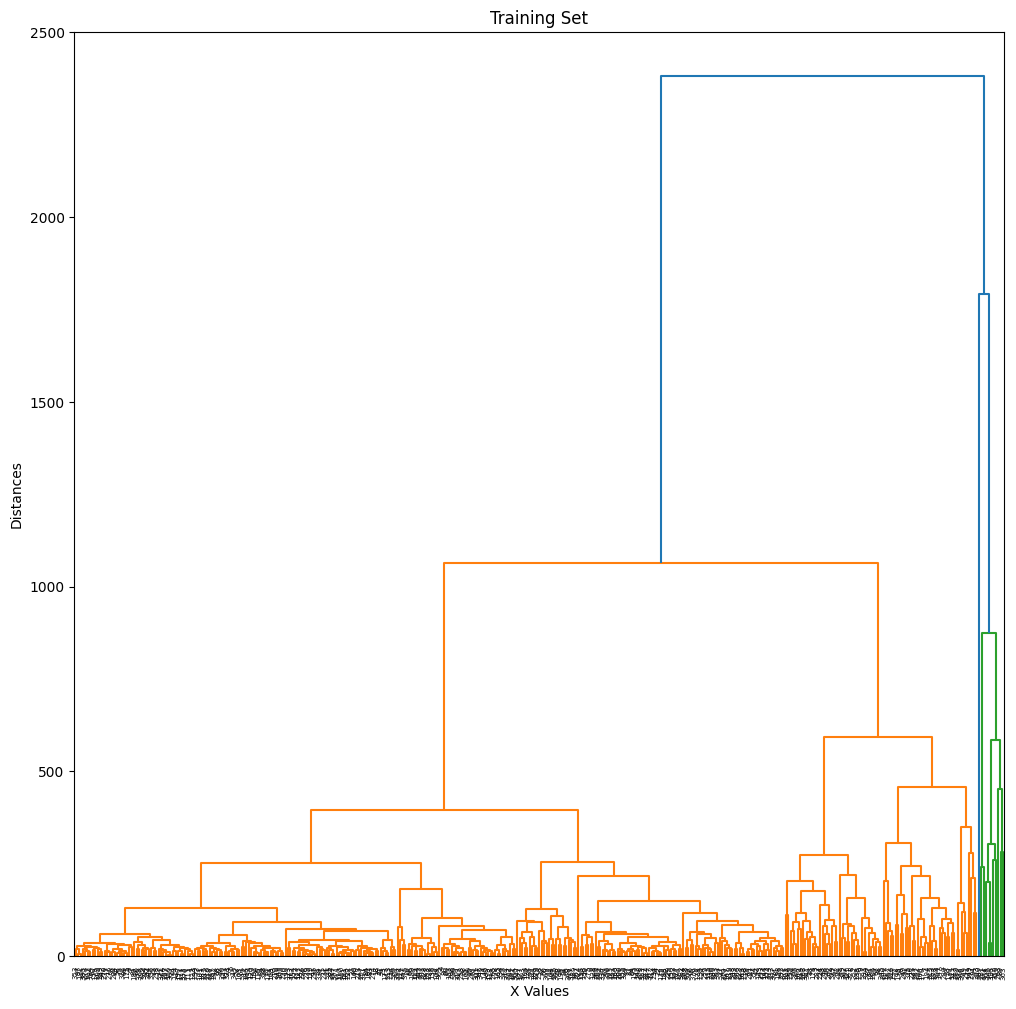

In [302]:
# dessiner le graphique hiérarchique pour l'ensemble de formation
plt.figure(figsize=(12,12)) # Créer une figure de taille 12x12 pouces

# Appliquer l'algorithme de linkage pour créer la matrice de liaison
# et dessiner le dendrogramme à partir de l'ensemble d'entraînement X_train
# méthode = 'average' (la distance moyenne entre tous les points des deux clusters)
dendrogram = sch.dendrogram(sch.linkage(X_train[:,:], method = 'average')) # complete,average,single

# Ajouter un titre au graphique
plt.title('Training Set') # Titre du dendrogramme

# Étiqueter l'axe des x
plt.xlabel('X Values') # Étiquette de l'axe des abscisses

# Étiqueter l'axe des y
plt.ylabel('Distances')# Étiquette de l'axe des ordonnées (représente les distances entre clusters)

# Afficher le graphique
plt.show()# Affichage du dendrogramme

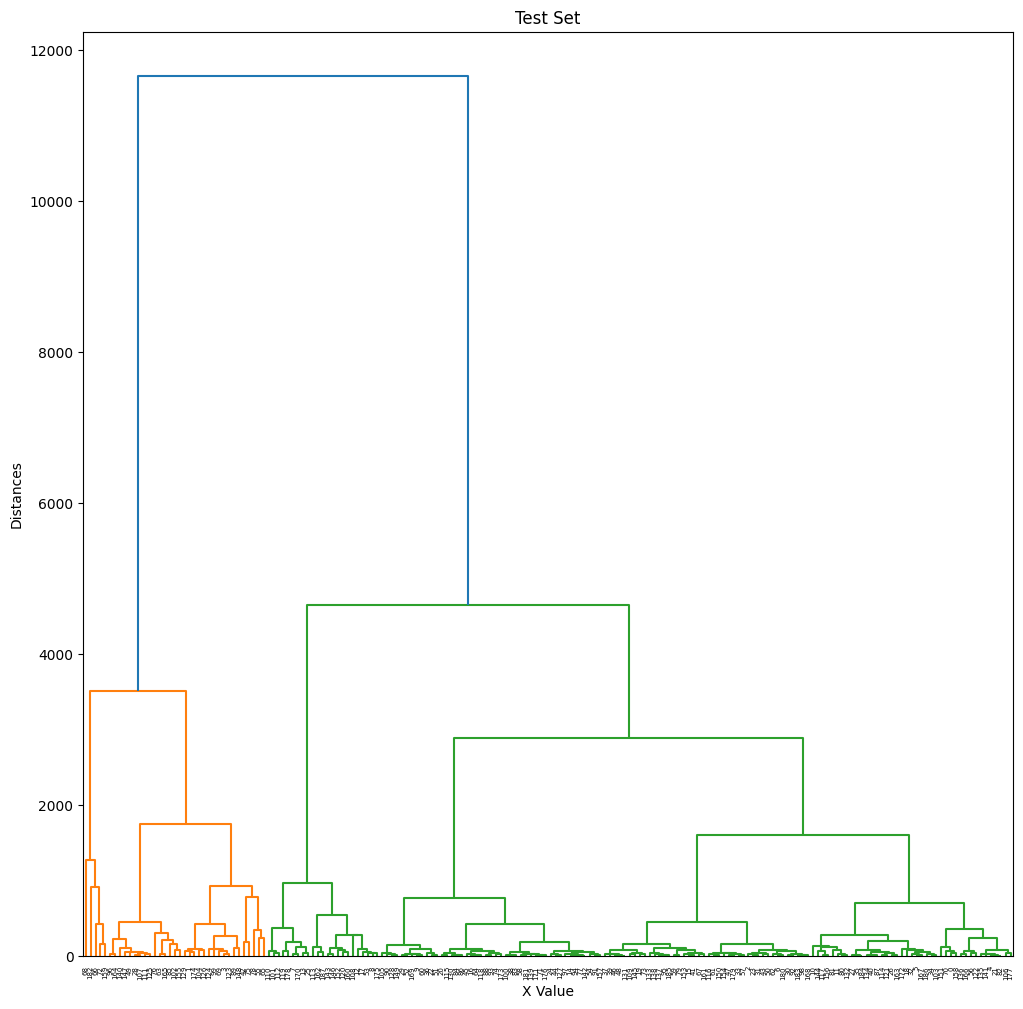

In [303]:
# dessiner le graphique hiérarchique pour l'ensemble de test
plt.figure(figsize=(12,12))

# Créer un dendrogramme en utilisant la méthode de liaison de Ward sur l'ensemble de test
# 'ward' minimise la variance intra-cluster pour chaque fusion
# On peut aussi utiliser d'autres méthodes comme 'complete', 'average' ou 'single'
dendrogram = sch.dendrogram(sch.linkage(X_test[:,:], method = 'ward'))# it can be complete,average,single

# Ajouter un titre au graphique
plt.title('Test Set')

# Ajouter un label à l'axe des abscisses
plt.xlabel('X Value')

# Ajouter un label à l'axe des ordonnées
plt.ylabel('Distances')

# Afficher le graphique
plt.show()

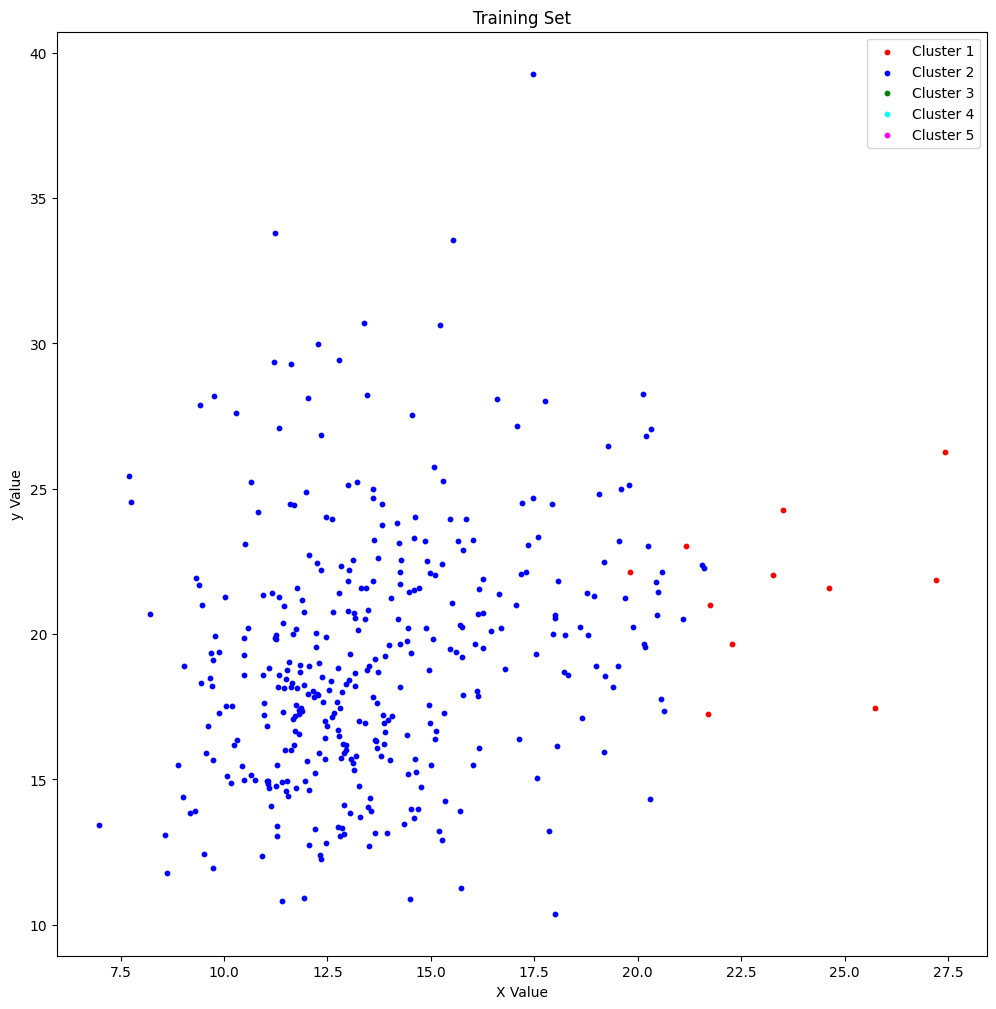

In [304]:
#draw the Scatter for Train set
# Création d'une figure avec une taille de 12x12 pour le graphique
plt.figure(figsize=(12,12))

# Tracer les points du premier groupe (Cluster 1) en rouge
plt.scatter(X_train[y_pred_train == 0, 0], X_train[y_pred_train == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Tracer les points du deuxième groupe (Cluster 2) en bleu
plt.scatter(X_train[y_pred_train == 1, 0], X_train[y_pred_train == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

# Tracer les points du troisième groupe (Cluster 3) en vert
plt.scatter(X_train[y_pred_train == 2, 0], X_train[y_pred_train == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# Tracer les points du quatrième groupe (Cluster 4) en cyan
plt.scatter(X_train[y_pred_train == 3, 0], X_train[y_pred_train == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# Tracer les points du cinquième groupe (Cluster 5) en magenta
plt.scatter(X_train[y_pred_train == 4, 0], X_train[y_pred_train == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

# Ajouter un titre au graphique
plt.title('Training Set')

# Ajouter un label à l'axe X
plt.xlabel('X Value')

# Ajouter un label à l'axe Y
plt.ylabel('y Value')

# Afficher la légende pour indiquer les clusters
plt.legend()

# Afficher le graphique
plt.show()

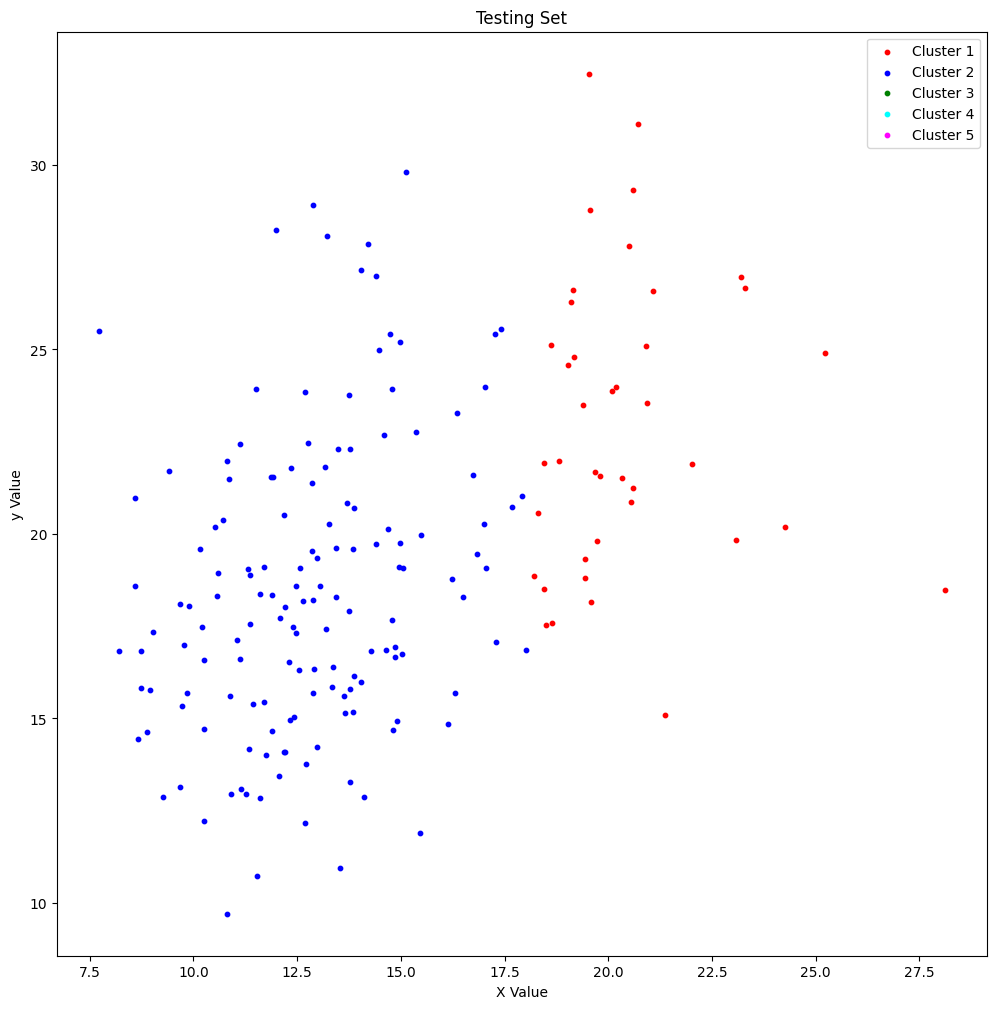

In [305]:
#draw the Scatter for Test set
# Créer une figure avec une taille de 12x12 pouces
plt.figure(figsize=(12,12))

# Afficher les points du test set où le prédicat appartient au Cluster 1 (y_pred_test == 0), en rouge et taille de point 10
plt.scatter(X_test[y_pred_test == 0, 0], X_test[y_pred_test == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Afficher les points du test set où le prédicat appartient au Cluster 2 (y_pred_test == 1), en bleu et taille de point 10
plt.scatter(X_test[y_pred_test == 1, 0], X_test[y_pred_test == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

# Afficher les points du test set où le prédicat appartient au Cluster 3 (y_pred_test == 2), en vert et taille de point 10
plt.scatter(X_test[y_pred_test == 2, 0], X_test[y_pred_test == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# Afficher les points du test set où le prédicat appartient au Cluster 4 (y_pred_test == 3), en cyan et taille de point 10
plt.scatter(X_test[y_pred_test == 3, 0], X_test[y_pred_test == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# Afficher les points du test set où le prédicat appartient au Cluster 5 (y_pred_test == 4), en magenta et taille de point 10
plt.scatter(X_test[y_pred_test == 4, 0], X_test[y_pred_test == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

# Ajouter un titre au graphique
plt.title('Testing Set')

# Ajouter un label à l'axe X
plt.xlabel('X Value')

# Ajouter un label à l'axe Y
plt.ylabel('y Value')

# Ajouter une légende pour identifier les clusters
plt.legend()

# Afficher le graphique
plt.show()

# K-means  [Doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)

In [306]:
# Chargement du jeu de données "breast cancer" à partir de la bibliothèque sklearn
BreastData = load_breast_cancer() # Chargement des données de cancer du sein

# Séparation des caractéristiques (features) et des labels (cibles)
X = BreastData.data  # X contient les caractéristiques des échantillons (par exemple, les mesures des cellules)

y = BreastData.target # y contient les étiquettes des classes (0 pour benign, 1 pour malignant)

In [307]:
# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [308]:
# Initialisation de l'algorithme KMeans avec 2 clusters (n_clusters=2)
kmean = KMeans(n_clusters= 2)

# Application de l'algorithme KMeans sur les données d'entraînement (X_train)
# pour obtenir les prédictions des clusters (y_pred_train)
y_pred_train = kmean.fit_predict(X_train)

# Application de l'algorithme KMeans sur les données de test (X_test)
y_pred_test = kmean.fit_predict(X_test)

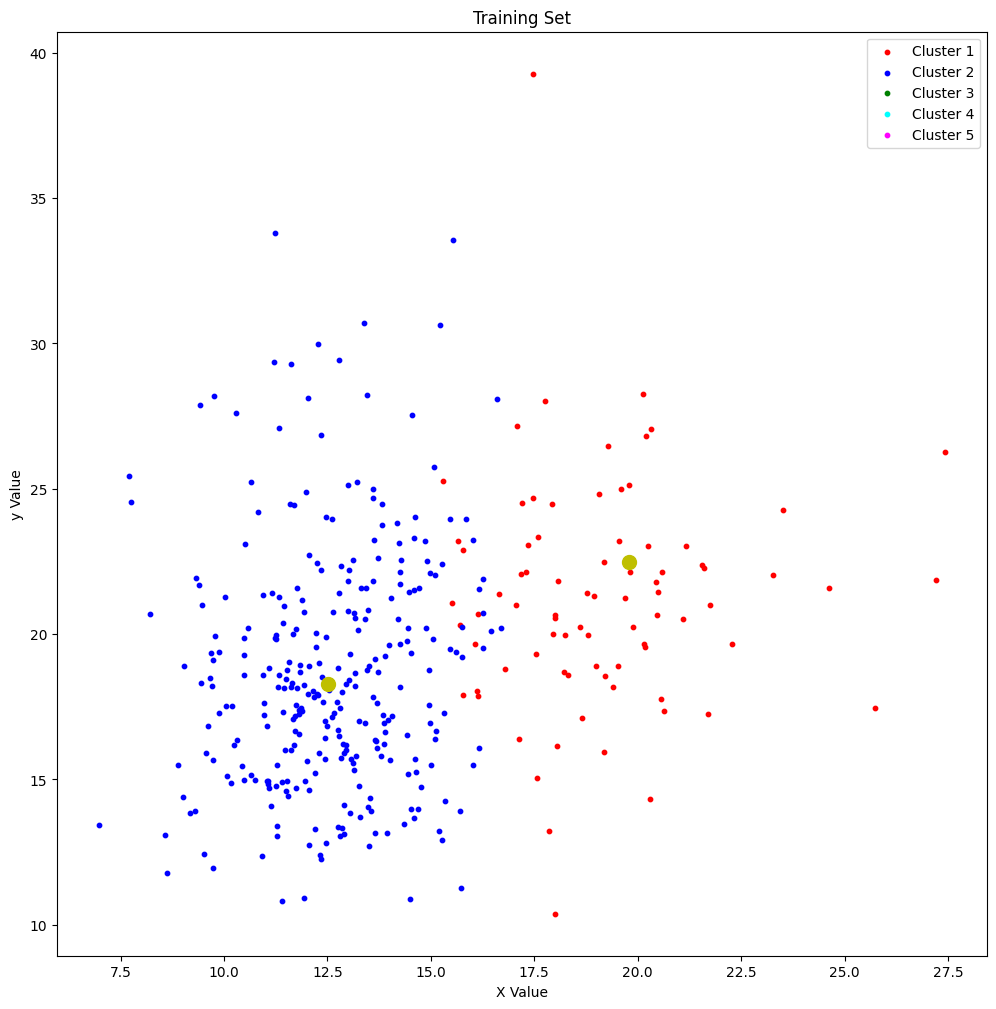

In [309]:
#draw the Scatter for Train set
# Création d'une figure de taille 12x12 pour le graphique
plt.figure(figsize=(12,12))

# Tracé des points du Cluster 1 (y_pred_train == 0) en rouge
plt.scatter(X_train[y_pred_train == 0, 0], X_train[y_pred_train == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Tracé des points du Cluster 2 (y_pred_train == 1) en bleu
plt.scatter(X_train[y_pred_train == 1, 0], X_train[y_pred_train == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

# Tracé des points du Cluster 3 (y_pred_train == 2) en vert
plt.scatter(X_train[y_pred_train == 2, 0], X_train[y_pred_train == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# Tracé des points du Cluster 4 (y_pred_train == 3) en cyan
plt.scatter(X_train[y_pred_train == 3, 0], X_train[y_pred_train == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# Tracé des points du Cluster 5 (y_pred_train == 4) en magenta
plt.scatter(X_train[y_pred_train == 4, 0], X_train[y_pred_train == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

# Tracé des centres des clusters (kmean.cluster_centers_) en jaune avec une taille de point de 100
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'y')

# Titre du graphique
plt.title('Training Set')

# Étiquette de l'axe X
plt.xlabel('X Value')

# Étiquette de l'axe Y
plt.ylabel('y Value')

# Affichage de la légende pour les clusters et les centres
plt.legend()

# Affichage du graphique
plt.show()

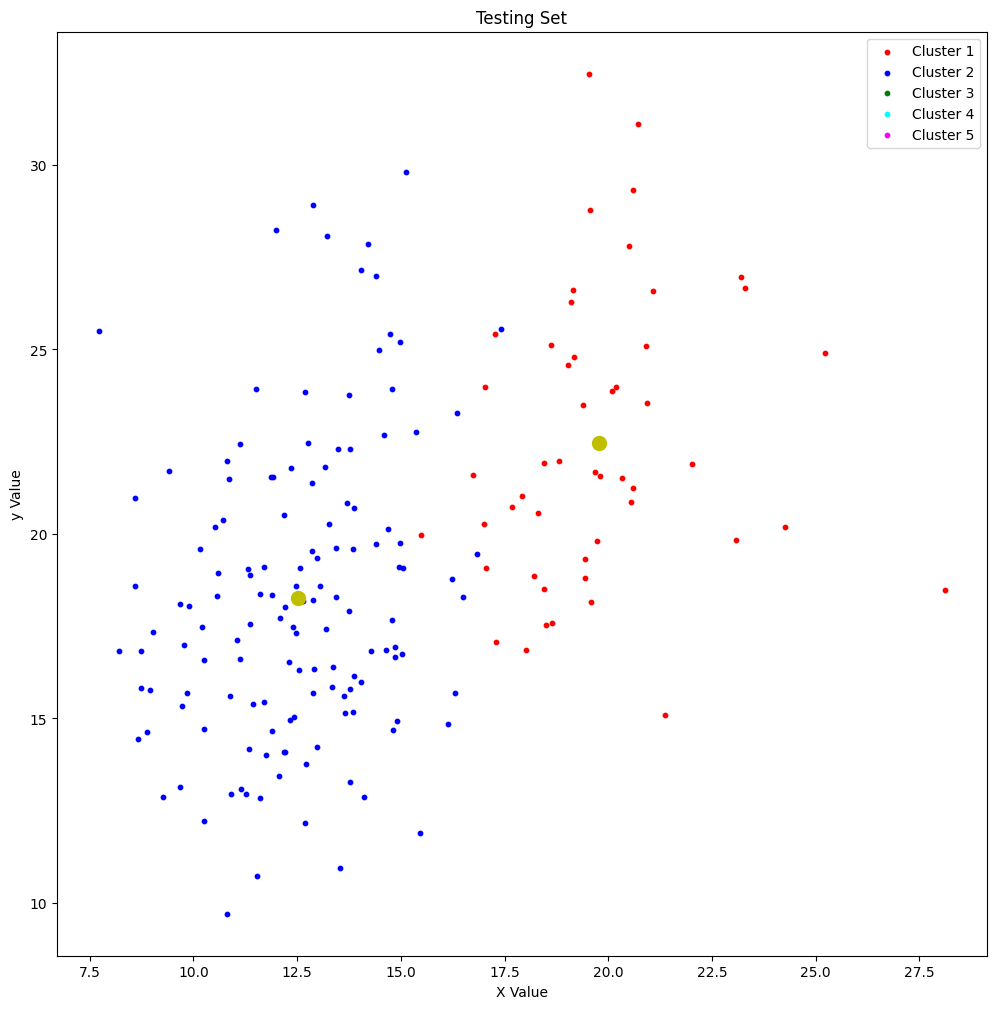

In [310]:
#draw the Scatter for Test set
# Création d'une figure avec une taille de 12x12 pouces pour le graphique
plt.figure(figsize=(12,12))

# Tracé des points du test set où la prédiction de classe est 0, en rouge
plt.scatter(X_test[y_pred_test == 0, 0], X_test[y_pred_test == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Tracé des points du test set où la prédiction de classe est 1, en bleu
plt.scatter(X_test[y_pred_test == 1, 0], X_test[y_pred_test == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

# Tracé des points du test set où la prédiction de classe est 2, en vert
plt.scatter(X_test[y_pred_test == 2, 0], X_test[y_pred_test == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# Tracé des points du test set où la prédiction de classe est 3, en cyan
plt.scatter(X_test[y_pred_test == 3, 0], X_test[y_pred_test == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# Tracé des points du test set où la prédiction de classe est 4, en magenta
plt.scatter(X_test[y_pred_test == 4, 0], X_test[y_pred_test == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

# Tracé des centres des clusters obtenus par KMeans, en jaune
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'y')

# Ajout du titre du graphique
plt.title('Testing Set')

# Ajout du label pour l'axe des x
plt.xlabel('X Value')

# Ajout du label pour l'axe des y
plt.ylabel('y Value')

# Ajout de la légende pour différencier les clusters
plt.legend()

# Affichage du graphique
plt.show()

# DBscan  [Doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [311]:
# Generate sample data
# Définir les centres des trois groupes de points (clusters)
centers = [[1, 1], [-1, -1], [1, -1]]

# Générer des données de type "blobs" avec 750 échantillons, répartis selon les centres définis ci-dessus
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

# Afficher la forme (dimensions) du tableau des labels réels
labels_true.shape

(750,)

In [312]:
# Applique la normalisation des données avec StandardScaler à X.
X = StandardScaler().fit_transform(X)

In [313]:
# Compute DBSCAN
# Applique l'algorithme DBSCAN sur les données X avec une distance epsilon de 0.3 et un minimum de 10 échantillons pour former un cluster
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# Crée un tableau booléen de la même taille que db.labels_ pour marquer les échantillons qui sont des points de noyau (core points)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

# Met à True les indices des points de noyau dans le tableau core_samples_mask en utilisant les indices des échantillons de noyau de DBSCAN
core_samples_mask[db.core_sample_indices_] = True

# Récupère les labels des clusters de DBSCAN (les étiquettes de chaque échantillon, où -1 représente un bruit)
labels = db.labels_

In [314]:
# Number of clusters in labels, ignoring noise if present.
# Calcul du nombre de clusters estimés en comptant les labels uniques dans la variable 'labels'
# Si la valeur -1 (qui représente le bruit) est présente, on la soustrait du total
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Comptage des points considérés comme du bruit dans les labels (les points avec le label -1)
n_noise_ = list(labels).count(-1)

# Affichage du nombre estimé de clusters
print('Estimated number of clusters: %d' % n_clusters_)

# Affichage du nombre estimé de points de bruit
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


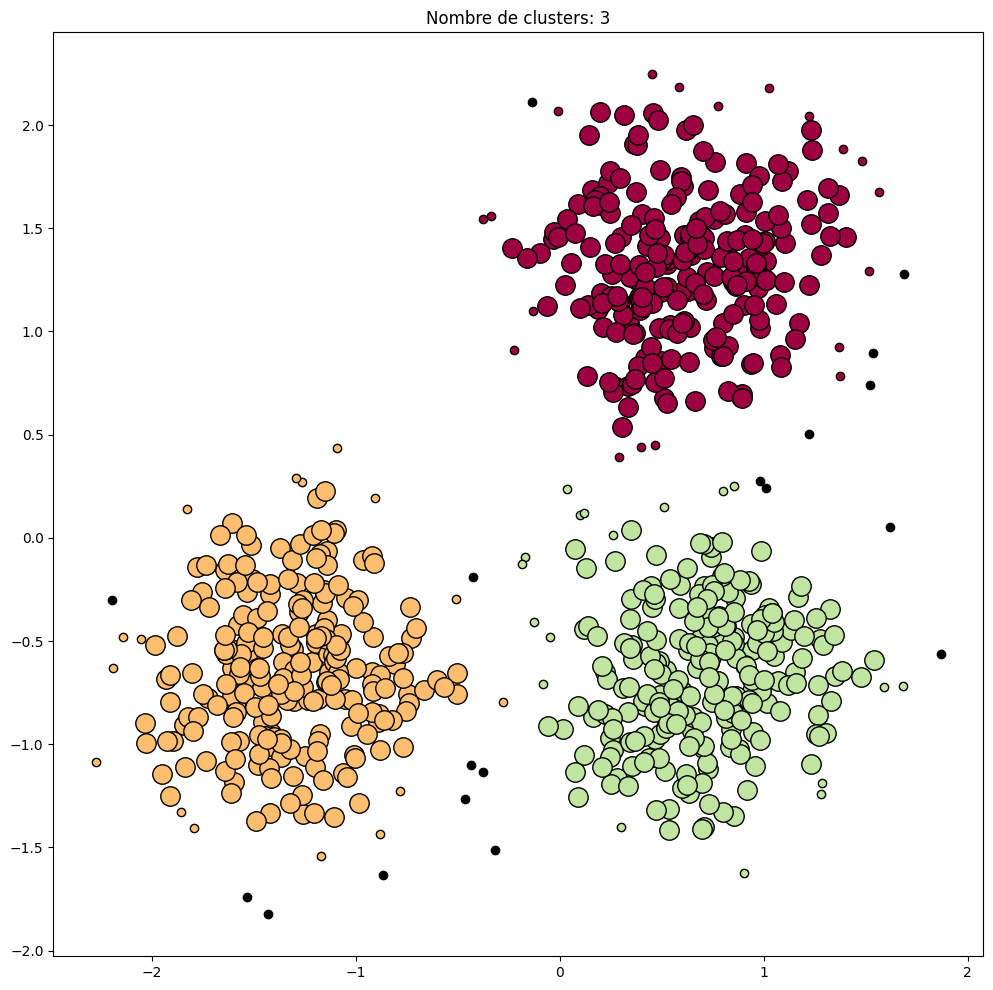

In [315]:
# Plot result
# Importation de la bibliothèque matplotlib pour la création de graphiques
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
# La couleur noire a été retirée et elle est utilisée pour le bruit.
unique_labels = set(labels) # On récupère les labels uniques des clusters
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] # Création d'une palette de couleurs pour chaque cluster

# Création d'un graphique de taille 12x12 pouces
plt.figure(figsize=(12,12))

# Boucle sur chaque label unique pour afficher les points des clusters
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noir utilisé pour représenter le bruit (points qui ne font pas partie d'un cluster)
        col = [0, 0, 0, 1]

    # On sélectionne les points de données qui appartiennent au cluster actuel et qui sont des points de noyau (core points)
    class_member_mask = (labels == k)

    # On récupère les points du cluster qui sont des points de noyau et on les trace avec une taille de point plus grande
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # On récupère les points du cluster qui ne sont pas des points de noyau et on les trace avec une taille de point plus petite
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

# Titre du graphique indiquant le nombre de clusters trouvés
plt.title('Nombre de clusters: %d' % n_clusters_)

# Affichage du graphique
plt.show()

# Comparaison des algorithmes sur un jeu de données synthétique

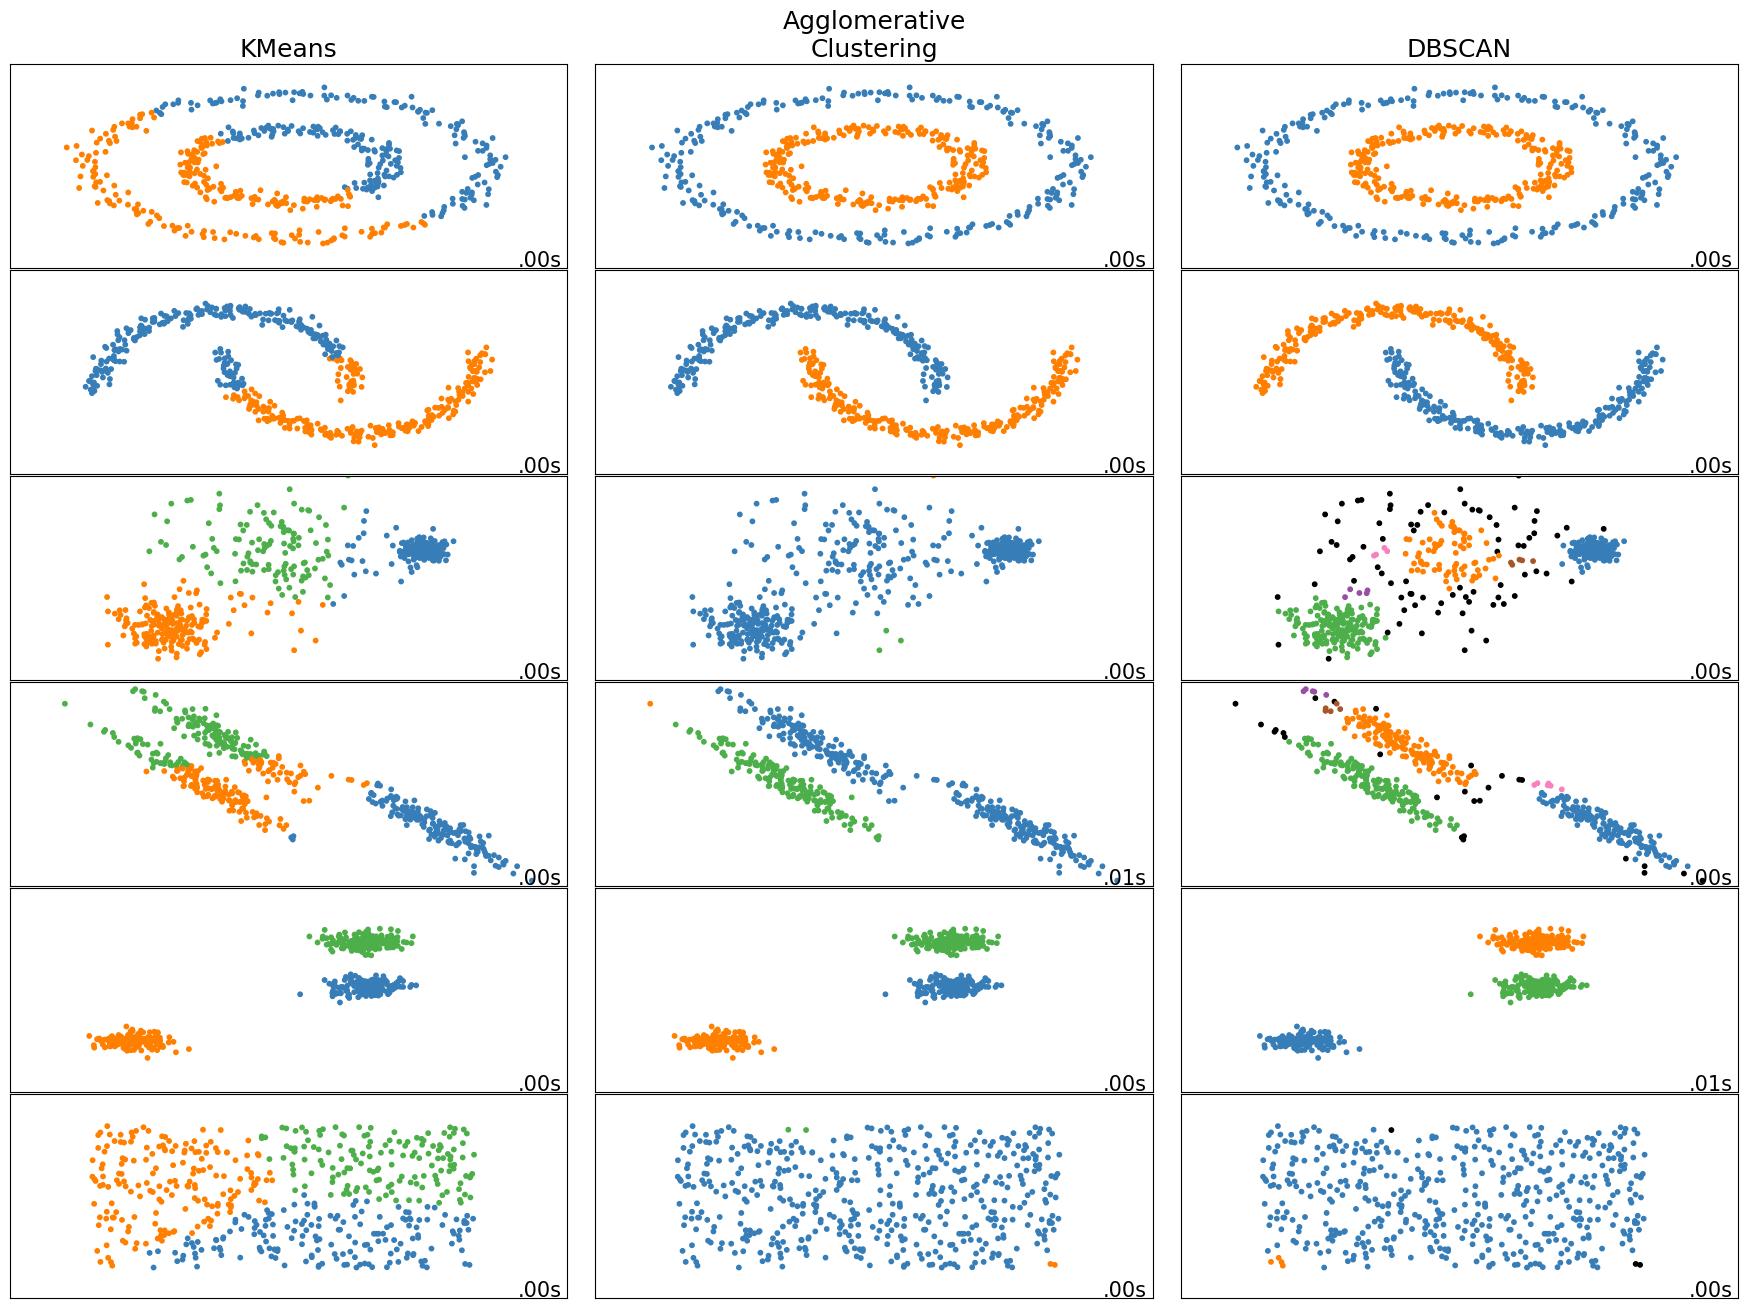

In [316]:


np.random.seed(0) # Fixe la graine aléatoire pour garantir la reproductibilité des résultats


# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============

n_samples = 500 # Définit le nombre d'échantillons pour chaque ensemble de données
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05) # Crée un ensemble de données de cercles bruyants
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)  # Crée un ensemble de données de lunes bruyantes
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)  # Crée un ensemble de données de blobs
no_structure = np.random.rand(n_samples, 2), None # Crée des données aléatoires sans structure

# Données anisotropiquement distribuées
random_state = 170 # Définit un état aléatoire pour garantir la reproductibilité
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state) # Crée des blobs de données
transformation = [[0.6, -0.6], [-0.4, 0.8]]  # Matrice de transformation anisotrope
X_aniso = np.dot(X, transformation)# Applique la transformation anisotrope aux données
aniso = (X_aniso, y)# Enregistre les données transformées

# Blobs avec des variances variées
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state) # Crée des blobs avec des écarts-types variés

# Configuration de la figure pour afficher les résultats
plt.figure(figsize=(18, 13)) # Crée une figure avec une taille spécifiée
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01)  # Ajuste les marges et les espaces entre les sous-graphiques

plot_num = 1 # Initialise un compteur pour l'affichage des graphiques

# Paramètres par défaut choisis pour les algorithmes de clustering
default_base = {"quantile": 0.3,"eps": 0.3,"damping": 0.9,"preference": -200,"n_neighbors": 3,"n_clusters": 3,"min_samples": 7,"xi": 0.05,"min_cluster_size": 0.1}

# Liste des datasets avec des paramètres spécifiques pour chaque dataset
datasets = [(noisy_circles,{"damping": 0.77,"preference": -240,"quantile": 0.2,"n_clusters": 2,"min_samples": 7,"xi": 0.08,}),
    (noisy_moons,{"damping": 0.75,"preference": -220,"n_clusters": 2,"min_samples": 7,"xi": 0.1, },),
    (varied,{"eps": 0.18,"n_neighbors": 2,"min_samples": 7,"xi": 0.01, "min_cluster_size": 0.2, }, ),
    (aniso,{"eps": 0.15, "n_neighbors": 2,"min_samples": 7,"xi": 0.1,"min_cluster_size": 0.2,},),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),]  # Liste des différents ensembles de données avec leurs paramètres spécifiques


# Pour chaque ensemble de données, on applique différents algorithmes de clustering
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # # Met à jour les paramètres par défaut avec des valeurs spécifiques à l'ensemble de données
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset # Sépare les données (X) et les labels (y) de l'ensemble de données

    # normaliser l'ensemble de données pour faciliter la sélection des paramètres
    X = StandardScaler().fit_transform(X)

    # Initialisation des différents algorithmes de clustering
    kmeans = KMeans(n_clusters=params["n_clusters"], random_state=170)


    dbscan = cluster.DBSCAN(eps=params["eps"]) # DBSCAN avec le paramètre eps

    # Clustering hiérarchique avec liaison simple
    average_linkage = cluster.AgglomerativeClustering(linkage="single", n_clusters=params["n_clusters"])

     # Modèle de mélanges gaussiens
    gmm = mixture.GaussianMixture(n_components=params["n_clusters"], covariance_type="full")

    # Liste des algorithmes de clustering à tester
    clustering_algorithms = (("KMeans", kmeans),("Agglomerative\nClustering", average_linkage), ("DBSCAN", dbscan))

    # Applique chaque algorithme de clustering et affiche les résultats
    for name, algorithm in clustering_algorithms:

        t0 = time.time()  # Enregistre le temps de début

        algorithm.fit(X) # Applique l'algorithme de clustering

        t1 = time.time() # Enregistre le temps de fin
        if hasattr(algorithm, "labels_"): # Si l'algorithme a un attribut 'labels_', cela signifie qu'il est déjà ajusté
            y_pred = algorithm.labels_.astype(int)
        else: # Sinon, on prédit les labels
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num) # Crée un sous-graphe pour afficher les résultats
        if i_dataset == 0:
            plt.title(name, size=18) # Affiche le nom de l'algorithme sur le premier graphique

        colors = np.array(list(islice(cycle(["#377eb8","#ff7f00","#4daf4a","#f781bf","#a65628", "#984ea3","#999999","#e41a1c", "#dede00",]), int(max(y_pred) + 1)))) # Définit les couleurs pour chaque cluster
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"]) # Ajoute une couleur noire pour les outliers
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])  # Affiche les données avec les couleurs des clusters
        plt.xlim(-2.5, 2.5) # Définit les limites de l'axe x
        plt.ylim(-2.5, 2.5)  # Définit les limites de l'axe y
        plt.xticks(()) # Supprime les ticks de l'axe x
        plt.yticks(()) # Supprime les ticks de l'axe y
        plt.text(0.99,0.01,("%.2fs" % (t1 - t0)).lstrip("0"),transform=plt.gca().transAxes,size=15,horizontalalignment="right",) # Affiche le temps d'exécution de l'algorithme
        plot_num += 1# Incrémente le compteur de graphiques

plt.show() # Affiche tous les graphiques générés

**Tâche à réaliser : Clustering K-Means, Agglomérative en utilisant les librairies sk-learn**

**Contexte :**
**Dans cette tâche, vous utiliserez un jeu de données appelé gene_expression_cancer.**
**L objectif de cette activité est d appliquer deux méthodes de clustering avec des métriques différentes : distance euclidienne et cosinus**
**Vous devez comparer les résultats et afficher les temps de calculs.**
**En utilisant une PCA refaites toutes les étapes précédentes.**

## <div class="alert alert-block alert-info">Vous devez retourner ce notebook avec les commentaires sur l'ensemble du code y compris la partie faite durant la séance de l'atelier !</div>

In [143]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
from sklearn.preprocessing import LabelEncoder # importer LabelEncoder pour convertir les données catégorielles en numerique
import pandas as pd  # Importation de la bibliothèque pandas pour la gestion de données

**Chargement des jeux de données**

**1.   Le chargement des jeux de données des caractéristiques**

In [145]:
data = pd.read_csv("/content/drive/MyDrive/Atelier 6/TCGA-PANCAN-HiSeq-801x20531/data.csv")
data= data.drop(data.columns[0], axis=1)

**2.   Le chargement des jeux de données de la variable cible**

In [146]:
labels = pd.read_csv("/content/drive/MyDrive/Atelier 6/TCGA-PANCAN-HiSeq-801x20531/labels.csv")
labels= labels.drop(labels.columns[0], axis=1)

**Encodage de la variable categorique labels**

In [147]:
label_encoder = LabelEncoder() # objet de labelEncoder
labels["class_Label"] = label_encoder.fit_transform(labels["Class"]) # transforme les valeurs de Sexe par label_encoder

**Normalisation et division du Dataset en Data train et test**

In [148]:
scaler = StandardScaler() # Création d'un objet StandardScaler

# Normalisation des caractéristiques : transformation pour avoir une moyenne de 0 et un écart-type de 1
data_scaled = scaler.fit_transform(data)

# Division du dataset en données d'entraînement (80%) et de test (20%)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data_scaled, labels["class_Label"], test_size=0.2, random_state=42)

**Affichage des dimensions des données d'entrainement et de test**

In [149]:
# Affiche la forme (dimensions) de la variable X_train
print("X1_train shape est " , X1_train.shape)

# Affiche la forme de la variable X_test
print("X1_test shape est " , X1_test.shape)

# Affiche la forme de la variable y_train
print("Y1_train shape est " , Y1_train.shape)

# Affiche la forme de la variable y_test
print("Y1_test shape est " , Y1_test.shape)

X1_train shape est  (640, 16383)
X1_test shape est  (161, 16383)
Y1_train shape est  (640,)
Y1_test shape est  (161,)




1.   **CLUSTERING K-MEANS**




**1.1 CLUSTERING K-MEANS AVEC LA DISTANCE EUCLIDIENNE**

**AVEC LE JEU DE DONNEES D'ENTRAINEMENT**

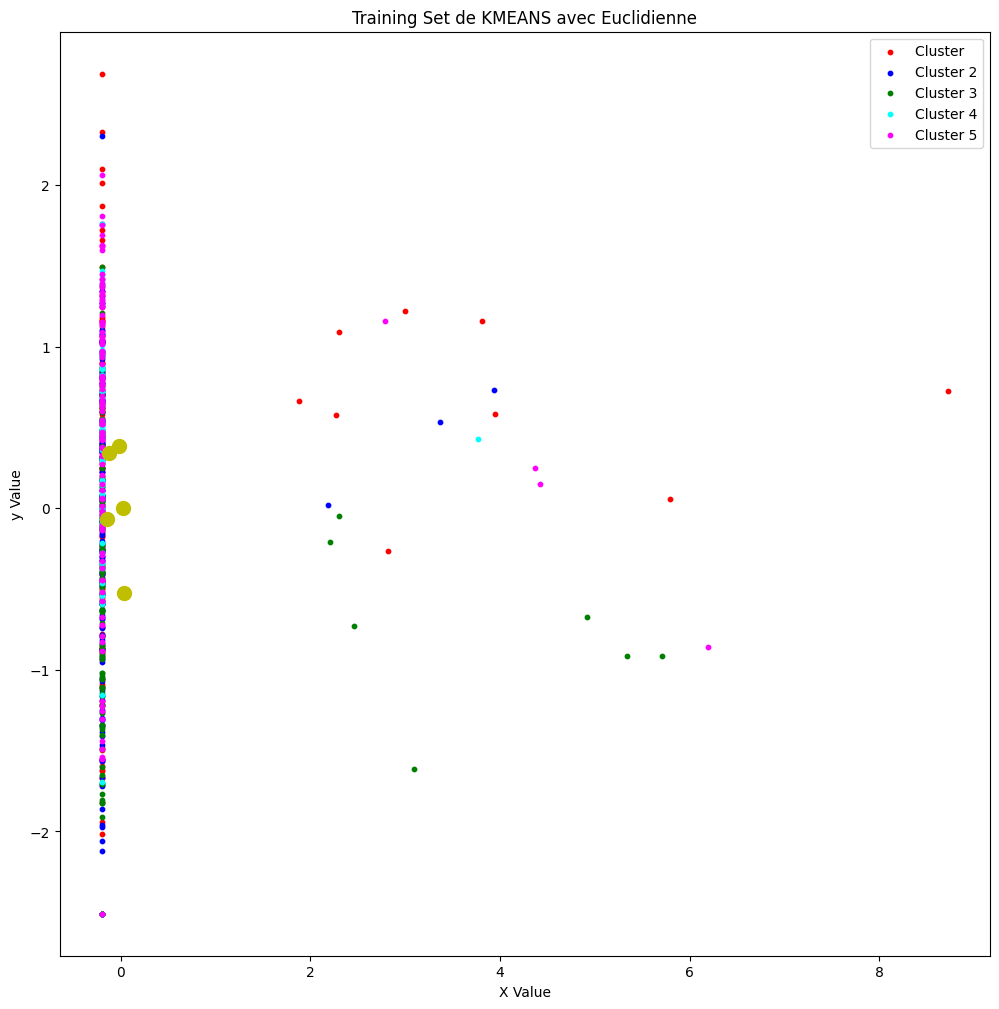

In [181]:
# Initialisation de l'algorithme KMeans avec 5 clusters (n_clusters=5)
kmean = KMeans(n_clusters= 5)

# Application de l'algorithme KMeans sur les données d'entraînement (X_train)
# pour obtenir les prédictions des clusters (y_pred_train)
y_pred_train = kmean.fit_predict(X1_train)

#draw the Scatter for Train set
# Création d'une figure de taille 12x12 pour le graphique
plt.figure(figsize=(12,12))

# Tracé des points du Cluster 1 (y_pred_train == 0) en rouge
plt.scatter(X1_train[y_pred_train == 0, 0], X1_train[y_pred_train == 0, 1], s = 10, c = "red", label = "Cluster ")

# Tracé des points du Cluster 2 (y_pred_train == 1) en bleu
plt.scatter(X1_train[y_pred_train == 1, 0], X1_train[y_pred_train == 1, 1], s = 10, c = "blue", label = "Cluster 2")

# Tracé des points du Cluster 3 (y_pred_train == 2) en vert
plt.scatter(X1_train[y_pred_train == 2, 0], X1_train[y_pred_train == 2, 1], s = 10, c = "green", label = "Cluster 3")

# Tracé des points du Cluster 4 (y_pred_train == 3) en cyan
plt.scatter(X1_train[y_pred_train == 3, 0], X1_train[y_pred_train == 3, 1], s = 10, c = "cyan", label = "Cluster 4")

# Tracé des points du Cluster 5 (y_pred_train == 4) en magenta
plt.scatter(X1_train[y_pred_train == 4, 0], X1_train[y_pred_train == 4, 1], s = 10, c = "magenta", label = "Cluster 5")

# Tracé des centres des clusters (kmean.cluster_centers_) en jaune avec une taille de point de 100
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = "y")

# Titre du graphique
plt.title("Training Set de KMEANS avec Euclidienne")

# Étiquette de l'axe X
plt.xlabel("X Value")

# Étiquette de l'axe Y
plt.ylabel("y Value")

# Affichage de la légende pour les clusters et les centres
plt.legend()

# Affichage du graphique
plt.show()

**AVEC LE JEU DE DONNEES TEST**

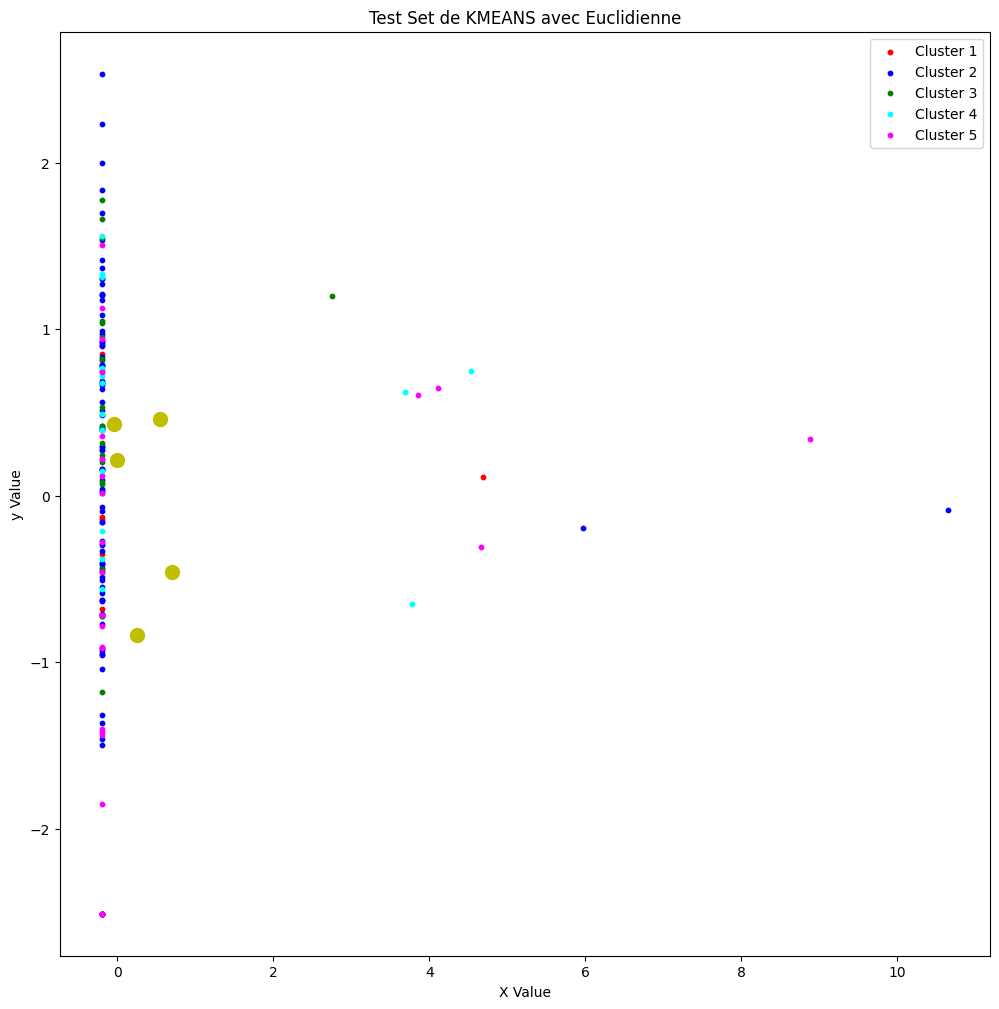

In [182]:
# Application de l'algorithme KMeans sur les données de test (X_test)
y_pred_test = kmean.fit_predict(X1_test)
#draw the Scatter for Test set
# Création d'une figure avec une taille de 12x12 pouces pour le graphique
plt.figure(figsize=(12,12))

# Tracé des points du test set où la prédiction de classe est 0, en rouge
plt.scatter(X1_test[y_pred_test == 0, 0], X1_test[y_pred_test == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Tracé des points du test set où la prédiction de classe est 1, en bleu
plt.scatter(X1_test[y_pred_test == 1, 0], X1_test[y_pred_test == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

# Tracé des points du test set où la prédiction de classe est 2, en vert
plt.scatter(X1_test[y_pred_test == 2, 0], X1_test[y_pred_test == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# Tracé des points du test set où la prédiction de classe est 3, en cyan
plt.scatter(X1_test[y_pred_test == 3, 0], X1_test[y_pred_test == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# Tracé des points du test set où la prédiction de classe est 4, en magenta
plt.scatter(X1_test[y_pred_test == 4, 0], X1_test[y_pred_test == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

# Tracé des centres des clusters obtenus par KMeans, en jaune
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'y')

# Ajout du titre du graphique
plt.title('Test Set de KMEANS avec Euclidienne')

# Ajout du label pour l'axe des x
plt.xlabel('X Value')

# Ajout du label pour l'axe des y
plt.ylabel('y Value')

# Ajout de la légende pour différencier les clusters
plt.legend()

# Affichage du graphique
plt.show()

**1.2 CLUSTERING K-MEANS AVEC LA DISTANCE COSINUS**

In [183]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

class KMeansCosine:
    def __init__(self, n_clusters=2, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        # Initialisation aléatoire des centres des clusters
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Calcul des distances cosinus entre chaque point et chaque centre
            distances = cosine_distances(X, self.centroids)

            # Attribution de chaque point au centre le plus proche (en termes de distance cosinus)
            new_labels = np.argmin(distances, axis=1)

            # Calcul des nouveaux centres des clusters
            new_centroids = np.array([X[new_labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Vérification de la convergence (on vérifie si les centres n'ont pas changé)
            if np.allclose(self.centroids, new_centroids, atol=self.tol):
                break

            # Mise à jour des centres
            self.centroids = new_centroids

        self.labels_ = new_labels

    def predict(self, X):
        # Calcul des distances cosinus entre les points de test et les centres des clusters
        distances = cosine_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

# Utilisation de KMeansCosine
#kmeans_cosine = KMeansCosine(n_clusters=5)
#kmeans_cosine.fit(X1_train)

# Prédictions pour les données d'entraînement et de test
#y_pred_train_cosine = kmeans_cosine.labels_
#y_pred_test_cosine = kmeans_cosine.predict(X1_test)

**AVEC LE JEU DE DONNES D'ENTRAINEMENT**

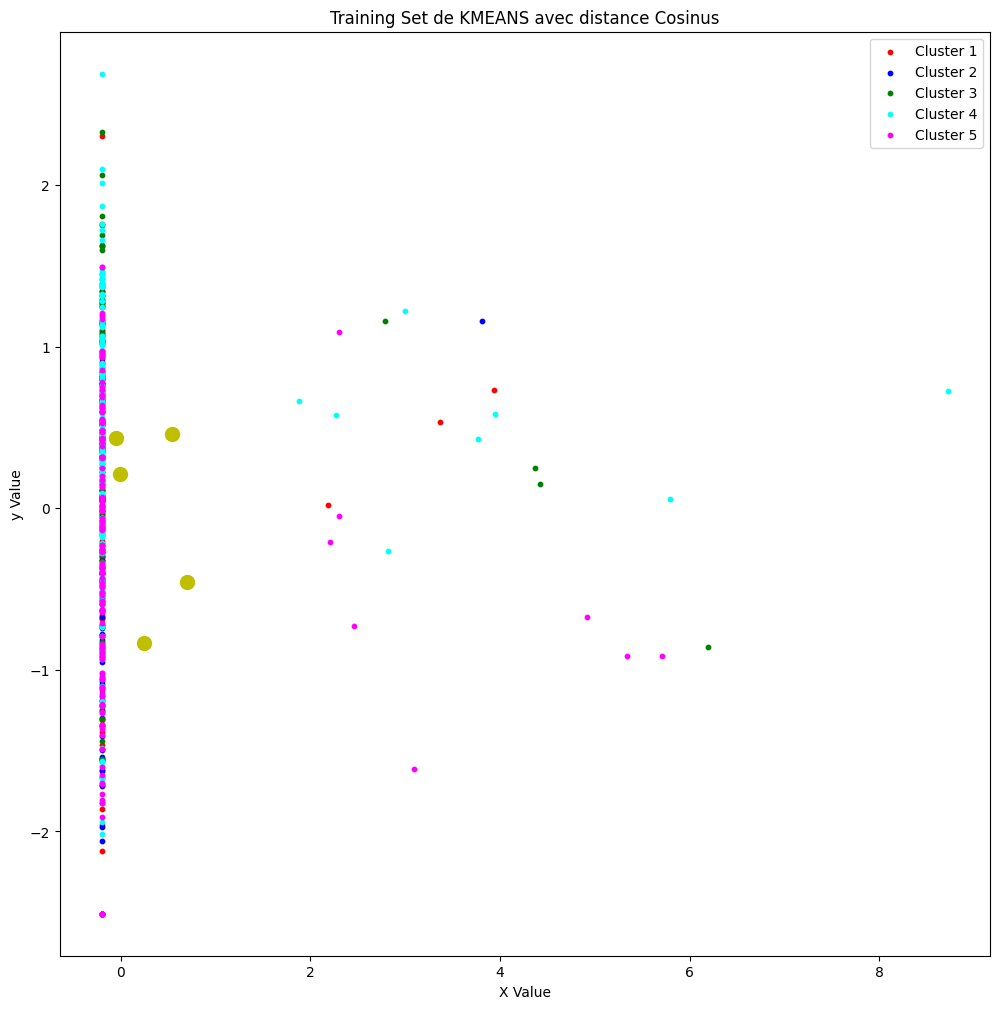

In [185]:
# Utilisation de KMeansCosine
kmeans_cosine = KMeansCosine(n_clusters=5)
kmeans_cosine.fit(X1_train)

# Prédictions pour les données d'entraînement
y_pred_train_cosine = kmeans_cosine.predict(X1_train)

#draw the Scatter for Train set
# Création d'une figure de taille 12x12 pour le graphique
plt.figure(figsize=(12,12))

# Tracé des points du Cluster 1 (y_pred_train == 0) en rouge
plt.scatter(X1_train[y_pred_train_cosine == 0, 0], X1_train[y_pred_train_cosine == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Tracé des points du Cluster 2 (y_pred_train == 1) en bleu
plt.scatter(X1_train[y_pred_train_cosine == 1, 0], X1_train[y_pred_train_cosine == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

# Tracé des points du Cluster 3 (y_pred_train == 2) en vert
plt.scatter(X1_train[y_pred_train_cosine == 2, 0], X1_train[y_pred_train_cosine == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# Tracé des points du Cluster 4 (y_pred_train == 3) en cyan
plt.scatter(X1_train[y_pred_train_cosine == 3, 0], X1_train[y_pred_train_cosine == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# Tracé des points du Cluster 5 (y_pred_train == 4) en magenta
plt.scatter(X1_train[y_pred_train_cosine == 4, 0], X1_train[y_pred_train_cosine == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

# Tracé des centres des clusters (kmean.cluster_centers_) en jaune avec une taille de point de 100
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'y')

# Titre du graphique
plt.title('Training Set de KMEANS avec distance Cosinus')

# Étiquette de l'axe X
plt.xlabel('X Value')

# Étiquette de l'axe Y
plt.ylabel('y Value')

# Affichage de la légende pour les clusters et les centres
plt.legend()

# Affichage du graphique
plt.show()

**AVEC LE JEU DE DONNEES DE TEST**

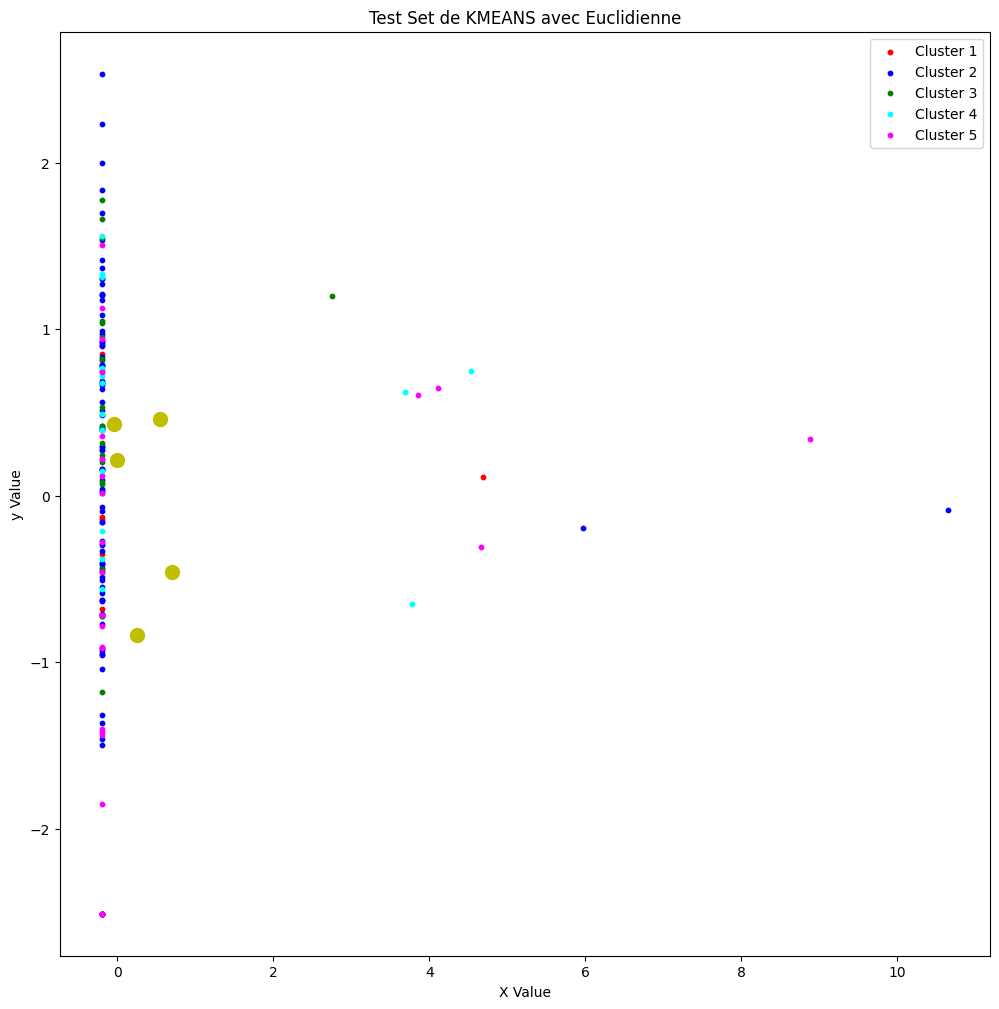

In [186]:
# Utilisation de KMeansCosine
kmeans_cosine = KMeansCosine(n_clusters=5)
kmeans_cosine.fit(X1_test)

# Prédictions pour les données de test
y_pred_test_cosine = kmeans_cosine.predict(X1_test)

#draw the Scatter for Test set
# Création d'une figure avec une taille de 12x12 pouces pour le graphique
plt.figure(figsize=(12,12))

# Tracé des points du test set où la prédiction de classe est 0, en rouge
plt.scatter(X1_test[y_pred_test == 0, 0], X1_test[y_pred_test == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Tracé des points du test set où la prédiction de classe est 1, en bleu
plt.scatter(X1_test[y_pred_test == 1, 0], X1_test[y_pred_test == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

# Tracé des points du test set où la prédiction de classe est 2, en vert
plt.scatter(X1_test[y_pred_test == 2, 0], X1_test[y_pred_test == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# Tracé des points du test set où la prédiction de classe est 3, en cyan
plt.scatter(X1_test[y_pred_test == 3, 0], X1_test[y_pred_test == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# Tracé des points du test set où la prédiction de classe est 4, en magenta
plt.scatter(X1_test[y_pred_test == 4, 0], X1_test[y_pred_test == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

# Tracé des centres des clusters obtenus par KMeans, en jaune
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'y')

# Ajout du titre du graphique
plt.title('Test Set de KMEANS avec Euclidienne')

# Ajout du label pour l'axe des x
plt.xlabel('X Value')

# Ajout du label pour l'axe des y
plt.ylabel('y Value')

# Ajout de la légende pour différencier les clusters
plt.legend()

# Affichage du graphique
plt.show()

2.   **AGGLOMERATIVE**

**2.1 AGGLOMERATIVE AVEC LA DISTANCE EUCLIDIENNE**

**AVEC LE JEU DE DONNEES D'ENTRAINEMENT**

In [187]:
# Création d'un modèle de regroupement hiérarchique agglomératif (Agglomerative Clustering)
AggClusteringModel_eud = AgglomerativeClustering(n_clusters=5,metric='euclidean', linkage='ward')

In [188]:
# Applique l’algorithme de regroupement hiérarchique (agglomératif) sur les données d’entraînement
# et prédit à quel groupe (cluster) appartient chaque échantillon de X_train
y_pred_train = AggClusteringModel_eud.fit_predict(X1_train)


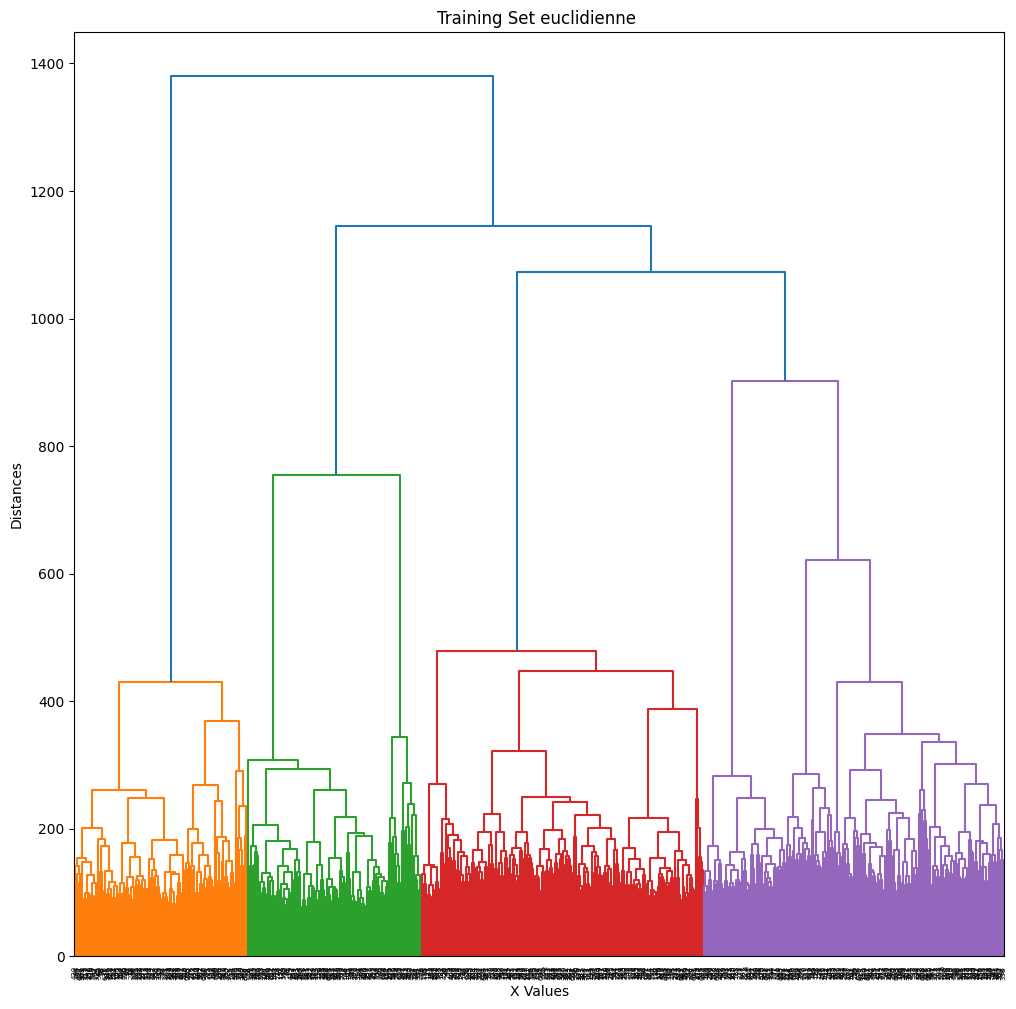

In [189]:
# dessiner le graphique hiérarchique pour l'ensemble de formation
plt.figure(figsize=(12,12)) # Créer une figure de taille 12x12 pouces

# Appliquer l'algorithme de linkage pour créer la matrice de liaison
# et dessiner le dendrogramme à partir de l'ensemble d'entraînement X_train
# méthode = 'average' (la distance moyenne entre tous les points des deux clusters)
dendrogram = sch.dendrogram(sch.linkage(X1_train[:,:], method = 'ward')) # complete,average,single

# Ajouter un titre au graphique
plt.title('Training Set euclidienne ') # Titre du dendrogramme

# Étiqueter l'axe des x
plt.xlabel('X Values') # Étiquette de l'axe des abscisses

# Étiqueter l'axe des y
plt.ylabel('Distances')# Étiquette de l'axe des ordonnées (représente les distances entre clusters)

# Afficher le graphique
plt.show()# Affichage du dendrogramme

**AVEC LE JEU DE DONNEES DE TEST**

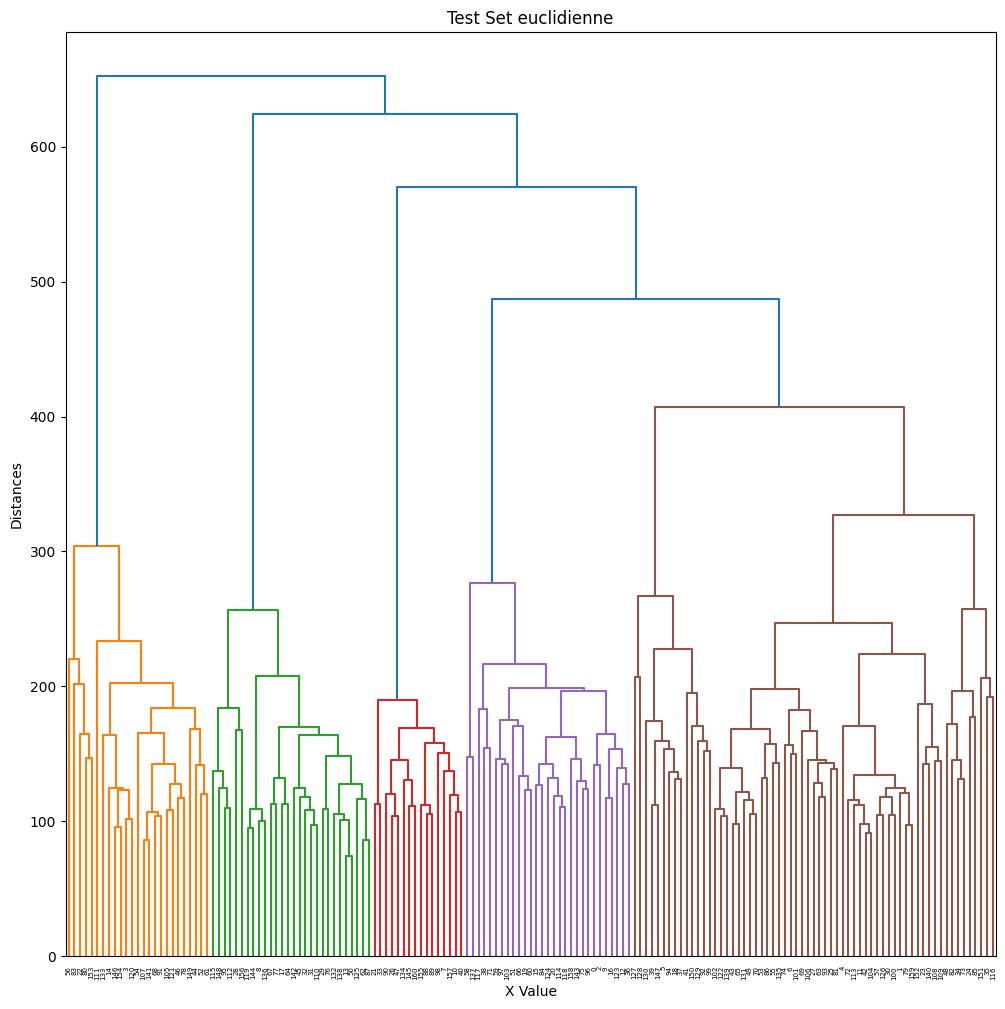

In [190]:
# Entraîne à nouveau le modèle de clustering agglomératif sur X_test et assigne un cluster à chaque échantillon
y_pred_test = AggClusteringModel_eud.fit_predict(X1_test)

# dessiner le graphique hiérarchique pour l'ensemble de test
plt.figure(figsize=(12,12))

# Créer un dendrogramme en utilisant la méthode de liaison de Ward sur l'ensemble de test
# 'ward' minimise la variance intra-cluster pour chaque fusion
# On peut aussi utiliser d'autres méthodes comme 'complete', 'average' ou 'single'
dendrogram = sch.dendrogram(sch.linkage(X1_test[:,:], method = "ward"))# it can be complete,average,single

# Ajouter un titre au graphique
plt.title("Test Set euclidienne")

# Ajouter un label à l'axe des abscisses
plt.xlabel("X Value")

# Ajouter un label à l'axe des ordonnées
plt.ylabel("Distances")

# Afficher le graphique
plt.show()

**2.2 AGGLOMERATIVE AVEC LA DISTANCE COSINUS**

In [159]:
# Création d'un modèle de regroupement hiérarchique agglomératif (Agglomerative Clustering)
AggClusteringModel_cos = AgglomerativeClustering(n_clusters=5,metric="cosine", linkage="average")

**AVEC LE JEU DE DONNEES D'ENTRAINEMENT**

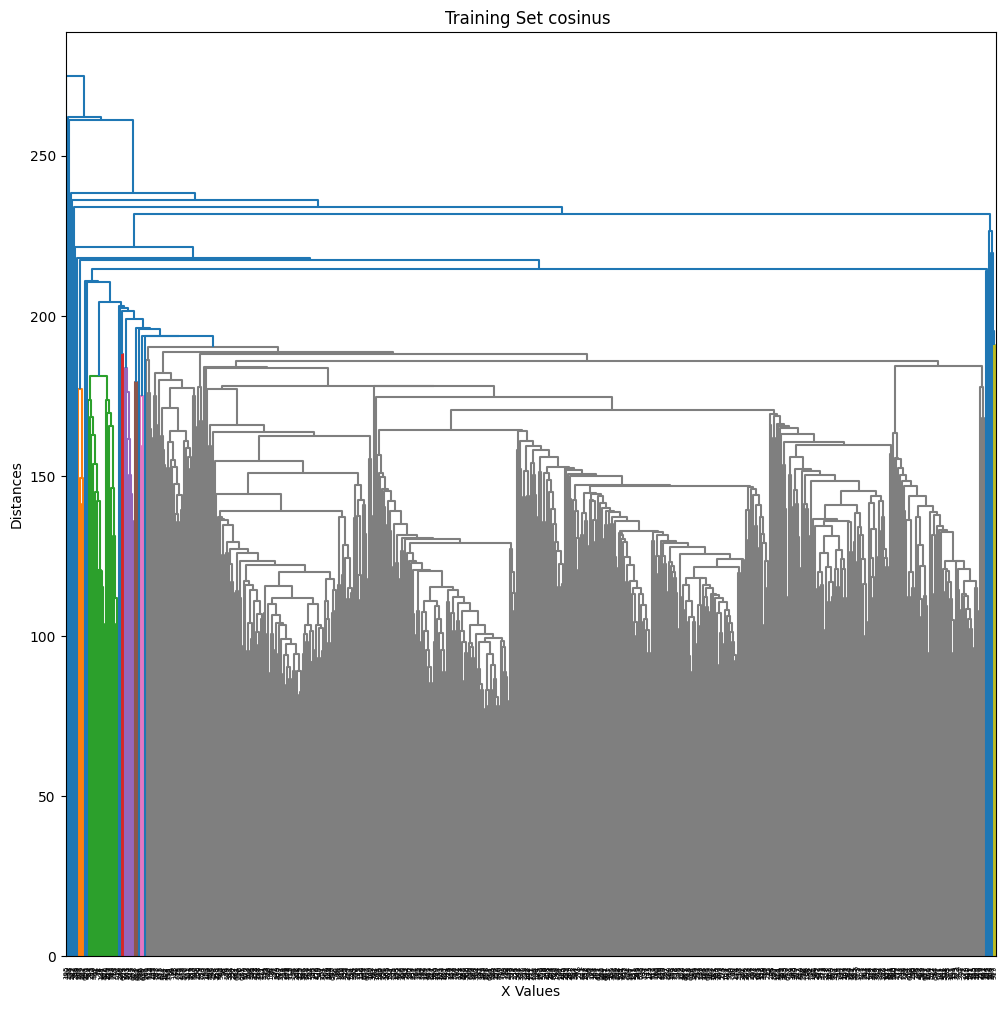

In [193]:
# Applique l’algorithme de regroupement hiérarchique (agglomératif) sur les données d’entraînement
# et prédit à quel groupe (cluster) appartient chaque échantillon de X_train
y_pred_train = AggClusteringModel_cos.fit_predict(X1_train)

# dessiner le graphique hiérarchique pour l'ensemble de formation
plt.figure(figsize=(12,12)) # Créer une figure de taille 12x12 pouces

# Appliquer l'algorithme de linkage pour créer la matrice de liaison
# et dessiner le dendrogramme à partir de l'ensemble d'entraînement X_train
# méthode = 'average' (la distance moyenne entre tous les points des deux clusters)
dendrogram = sch.dendrogram(sch.linkage(X1_train[:,:], method = "average")) # complete,average,single

# Ajouter un titre au graphique
plt.title("Training Set cosinus ") # Titre du dendrogramme

# Étiqueter l'axe des x
plt.xlabel("X Values") # Étiquette de l'axe des abscisses

# Étiqueter l'axe des y
plt.ylabel("Distances")# Étiquette de l'axe des ordonnées (représente les distances entre clusters)

# Afficher le graphique
plt.show()# Affichage du dendrogramme

**AVEC LE JEU DE DONNEES DE TEST**

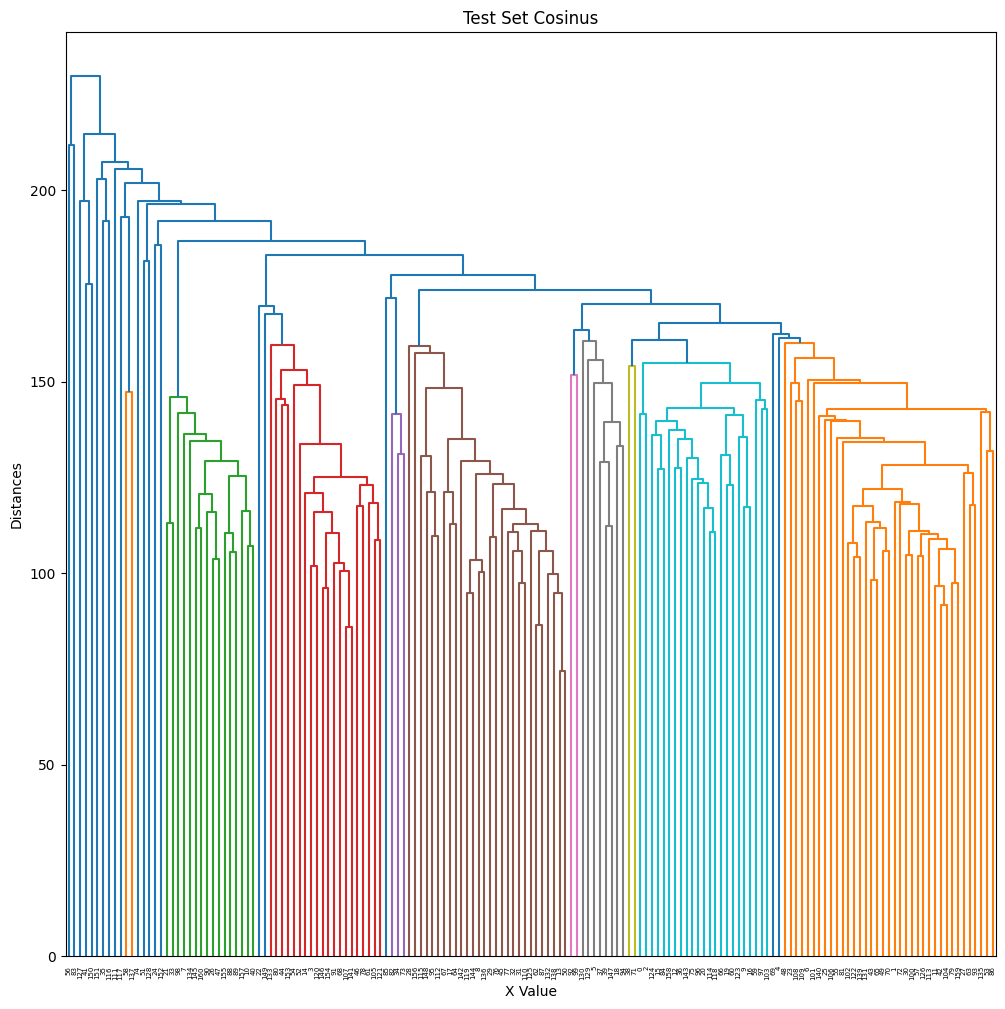

In [194]:
# Entraîne à nouveau le modèle de clustering agglomératif sur X_test et assigne un cluster à chaque échantillon
y_pred_test = AggClusteringModel_cos.fit_predict(X1_test)

# dessiner le graphique hiérarchique pour l'ensemble de test
plt.figure(figsize=(12,12))

# Créer un dendrogramme en utilisant la méthode de liaison de Ward sur l'ensemble de test
# 'ward' minimise la variance intra-cluster pour chaque fusion
# On peut aussi utiliser d'autres méthodes comme 'complete', 'average' ou 'single'
dendrogram = sch.dendrogram(sch.linkage(X1_test[:,:], method = "average"))# it can be complete,average,single

# Ajouter un titre au graphique
plt.title("Test Set Cosinus")

# Ajouter un label à l'axe des abscisses
plt.xlabel("X Value")

# Ajouter un label à l'axe des ordonnées
plt.ylabel("Distances")

# Afficher le graphique
plt.show()

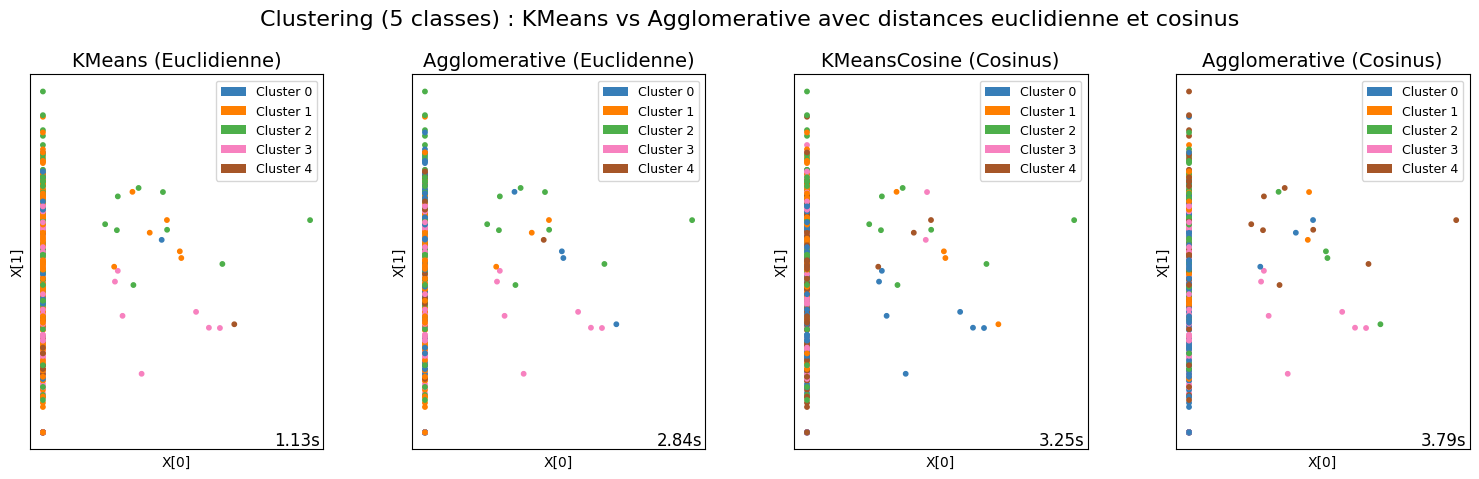

In [294]:
from matplotlib.patches import Patch  # Pour créer des éléments de légende personnalisés

# Normalisation des données
X = StandardScaler().fit_transform(X1_train)  # Met les données à l'échelle avec moyenne 0 et écart-type 1

# Nombre de clusters (classes)
n_clusters1 = 5  # On veut regrouper les données en 5 clusters

# Configuration de la figure
plt.figure(figsize=(16, 5))  # Crée une figure de taille 16x5 pouces
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.85, wspace=0.3)  # Ajuste les marges et l'espacement entre les sous-graphes

# Définir les algorithmes
clustering_algorithms = [
    ("KMeans (Euclidienne)", KMeans(n_clusters=n_clusters1, random_state=170)),  # KMeans avec distance euclidienne
    ("Agglomerative (Euclidenne)", AgglomerativeClustering(n_clusters=n_clusters1, linkage="ward")),  # Clustering hiérarchique, linkage de Ward (euclidienne)
    ("KMeansCosine (Cosinus)", KMeansCosine(n_clusters=n_clusters1)),  # KMeans modifié pour utiliser la distance cosinus
    ("Agglomerative (Cosinus)", AgglomerativeClustering(n_clusters=n_clusters1, metric="cosine", linkage="average"))  # Clustering hiérarchique avec distance cosinus
]

# Boucle sur les algorithmes
for i, (name, algorithm) in enumerate(clustering_algorithms):
    t0 = time.time()  # Début du chronométrage

    # Si l'algorithme utilise la distance cosinus
    if "Cosine" in name:
        if isinstance(algorithm, AgglomerativeClustering):  # Pour l'agglomératif avec cosinus, on applique directement
            algorithm.fit(X)
        else:  # Pour KMeans avec cosinus, on doit normaliser chaque vecteur
            X_cosine = X / np.linalg.norm(X, axis=1, keepdims=True)  # Normalisation ligne par ligne (produit scalaire = cosinus)
            algorithm.fit(X_cosine)
    else:
        algorithm.fit(X)  # Sinon, on applique simplement l'algo avec les données normalisées

    t1 = time.time()  # Fin du chronométrage

    # Récupération des labels
    if hasattr(algorithm, "labels_"):  # Certains algorithmes stockent les labels directement
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)  # D'autres nécessitent un appel à `.predict`

    # Affichage du clustering
    plt.subplot(1, 4, i+1)  # Crée un sous-graphique (1 ligne, 4 colonnes)
    plt.title(name, size=14)  # Titre du graphique

    # Palette de couleurs pour les clusters
    colors = np.array(list(islice(cycle(["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628",
                                         "#984ea3", "#999999", "#e41a1c", "#dede00", "#00CED1"]),
                                   int(max(y_pred) + 1))))  # Génère des couleurs différentes pour chaque cluster
    colors = np.append(colors, ["#000000"])  # Ajoute une couleur noire pour d'éventuels outliers

    # Affiche les points avec la couleur correspondant à leur cluster
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    # Création des légendes avec les couleurs associées
    legend_elements = [Patch(facecolor=colors[k], label=f"Cluster {k}") for k in np.unique(y_pred)]
    plt.legend(handles=legend_elements, loc="upper right", fontsize=9, frameon=True)  # Affiche la légende

    # Supprime les ticks pour un affichage plus clair
    plt.xticks(())
    plt.yticks(())

    # Affiche le temps d'exécution en bas à droite du graphique
    plt.text(0.99, 0.01, ("%.2fs" % (t1 - t0)).lstrip("0"),
             transform=plt.gca().transAxes, size=12, ha="right")

    # Noms des axes
    plt.xlabel("X[0]")
    plt.ylabel("X[1]")

# Titre global de la figure
plt.suptitle("Clustering (5 classes) : KMeans vs Agglomerative avec distances euclidienne et cosinus", fontsize=16)
plt.show()  # Affiche la figure complète

 *   Nous avons remarqué que le temps d'execution de Agglomerative est plus long que le temps d'execution de KMeans, independamment des mesures de metriques.


*   Le temps d'execution avec la distance Cosinus est beaucoup plus long que le temps d'execution avec la distance Euclidienne





> **APPLICATION DE PCA SUR LE JEU DE DONNEES D'ENTRAINEMENT**



**UTILISATION DE PCA**

In [267]:
# Importation de la classe PCA du module sklearn.decomposition
from sklearn.decomposition import PCA

# Création d'une instance de PCA pour réduire les données à 2 dimensions principales
pca = PCA(n_components=2)

# Réduction de la dimensionnalité des données d'entraînement à 2 composantes principales
X_pca_train = pca.fit_transform(X1_train)

# Normalisation des données réduites (centrage et réduction)
X_train_scaler = StandardScaler().fit_transform(X_pca_train)


> K**MEANS**



**KMEANS AVEC EUCLIDIENNE**

In [268]:
# Initialisation de l'algorithme KMeans avec 5 clusters (n_clusters=5)
kmean = KMeans(n_clusters= 5)

# Application de l'algorithme KMeans sur les données d'entraînement (X_train)
# pour obtenir les prédictions des clusters (y_pred_train)
y_pred_train = kmean.fit_predict(X_train_scaler)

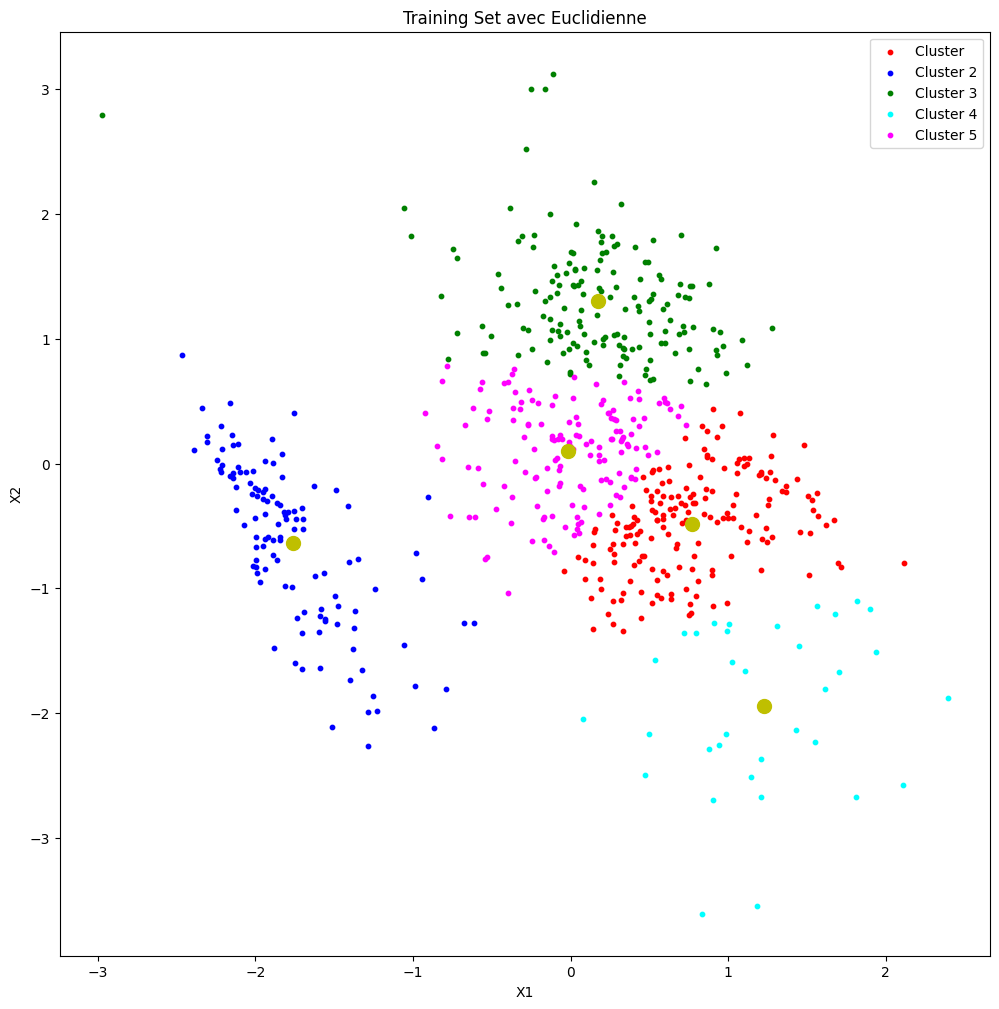

In [270]:
#draw the Scatter for Train set
# Création d'une figure de taille 12x12 pour le graphique
plt.figure(figsize=(12,12))

# Tracé des points du Cluster 1 (y_pred_train == 0) en rouge
plt.scatter(X_train_scaler[y_pred_train == 0, 0], X_train_scaler[y_pred_train == 0, 1], s = 10, c = "red", label = "Cluster ")

# Tracé des points du Cluster 2 (y_pred_train == 1) en bleu
plt.scatter(X_train_scaler[y_pred_train == 1, 0], X_train_scaler[y_pred_train == 1, 1], s = 10, c = "blue", label = "Cluster 2")

# Tracé des points du Cluster 3 (y_pred_train == 2) en vert
plt.scatter(X_train_scaler[y_pred_train == 2, 0],X_train_scaler[y_pred_train == 2, 1], s = 10, c = "green", label = "Cluster 3")

# Tracé des points du Cluster 4 (y_pred_train == 3) en cyan
plt.scatter(X_train_scaler[y_pred_train == 3, 0], X_train_scaler[y_pred_train == 3, 1], s = 10, c = "cyan", label = "Cluster 4")

# Tracé des points du Cluster 5 (y_pred_train == 4) en magenta
plt.scatter(X_train_scaler[y_pred_train == 4, 0], X_train_scaler[y_pred_train == 4, 1], s = 10, c = "magenta", label = "Cluster 5")

# Tracé des centres des clusters (kmean.cluster_centers_) en jaune avec une taille de point de 100
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = "y")

# Titre du graphique
plt.title("Training Set avec Euclidienne")

# Étiquette de l'axe X
plt.xlabel("X1")

# Étiquette de l'axe Y
plt.ylabel("X2")

# Affichage de la légende pour les clusters et les centres
plt.legend()

# Affichage du graphique
plt.show()

**KMEANS AVEC COSINUS**

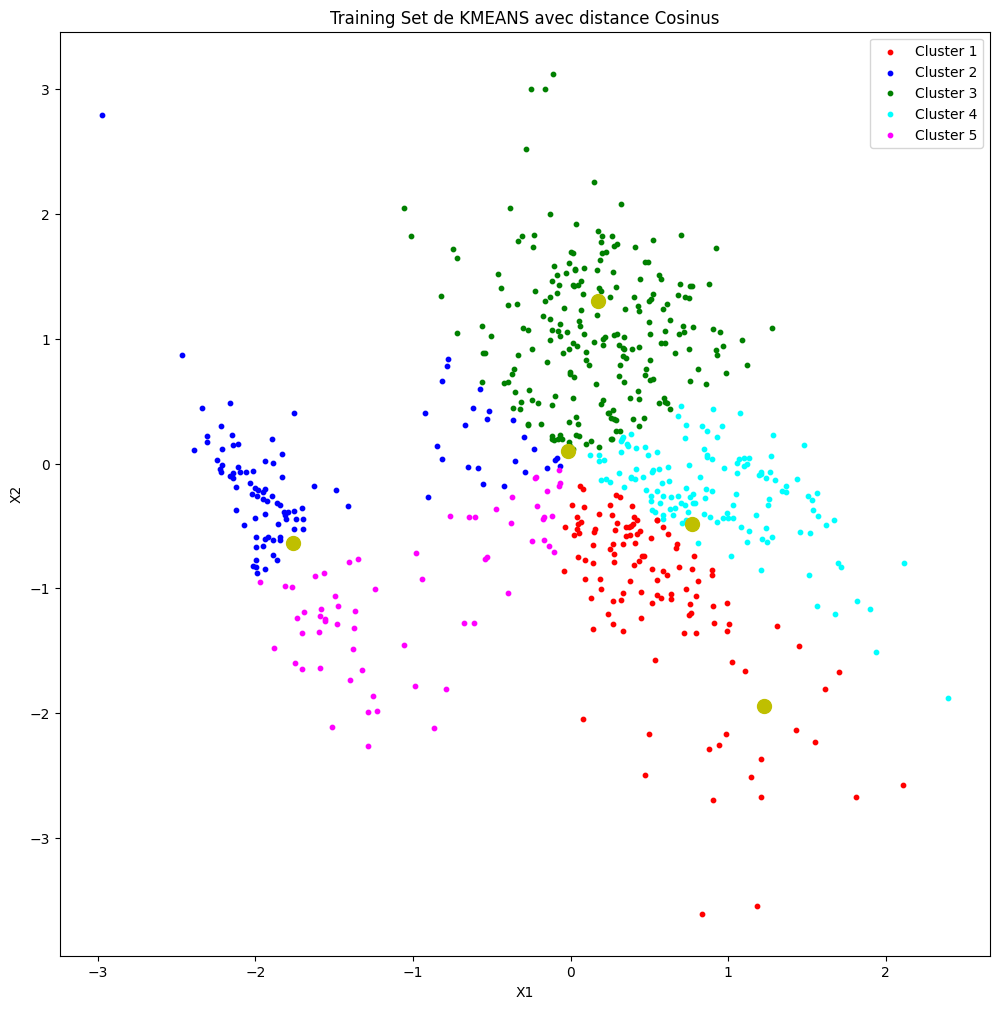

In [271]:
# Utilisation de KMeansCosine
kmeans_cosine = KMeansCosine(n_clusters=5)
kmeans_cosine.fit(X_train_scaler)

# Prédictions pour les données d'entraînement
y_pred_train_cosine = kmeans_cosine.predict(X_train_scaler)

#draw the Scatter for Train set
# Création d'une figure de taille 12x12 pour le graphique
plt.figure(figsize=(12,12))

# Tracé des points du Cluster 1 (y_pred_train == 0) en rouge
plt.scatter(X_train_scaler[y_pred_train_cosine == 0, 0], X_train_scaler[y_pred_train_cosine == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Tracé des points du Cluster 2 (y_pred_train == 1) en bleu
plt.scatter(X_train_scaler[y_pred_train_cosine == 1, 0], X_train_scaler[y_pred_train_cosine == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

# Tracé des points du Cluster 3 (y_pred_train == 2) en vert
plt.scatter(X_train_scaler[y_pred_train_cosine == 2, 0], X_train_scaler[y_pred_train_cosine == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# Tracé des points du Cluster 4 (y_pred_train == 3) en cyan
plt.scatter(X_train_scaler[y_pred_train_cosine == 3, 0], X_train_scaler[y_pred_train_cosine == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# Tracé des points du Cluster 5 (y_pred_train == 4) en magenta
plt.scatter(X_train_scaler[y_pred_train_cosine == 4, 0], X_train_scaler[y_pred_train_cosine == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

# Tracé des centres des clusters (kmean.cluster_centers_) en jaune avec une taille de point de 100
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'y')

# Titre du graphique
plt.title('Training Set de KMEANS avec distance Cosinus')

# Étiquette de l'axe X
plt.xlabel('X1')

# Étiquette de l'axe Y
plt.ylabel('X2')

# Affichage de la légende pour les clusters et les centres
plt.legend()

# Affichage du graphique
plt.show()


> **AGGLOMERATIVE**



**AVEC LA DISTANCE EUCLIDIENNE**

In [272]:
# Création d'un modèle de regroupement hiérarchique agglomératif (Agglomerative Clustering)
AggClusteringModel_eud = AgglomerativeClustering(n_clusters=5,metric='euclidean', linkage='ward')

In [273]:
# Applique l’algorithme de regroupement hiérarchique (agglomératif) sur les données d’entraînement
# et prédit à quel groupe (cluster) appartient chaque échantillon de X_train
y_pred_train = AggClusteringModel_eud.fit_predict(X_train_scaler)

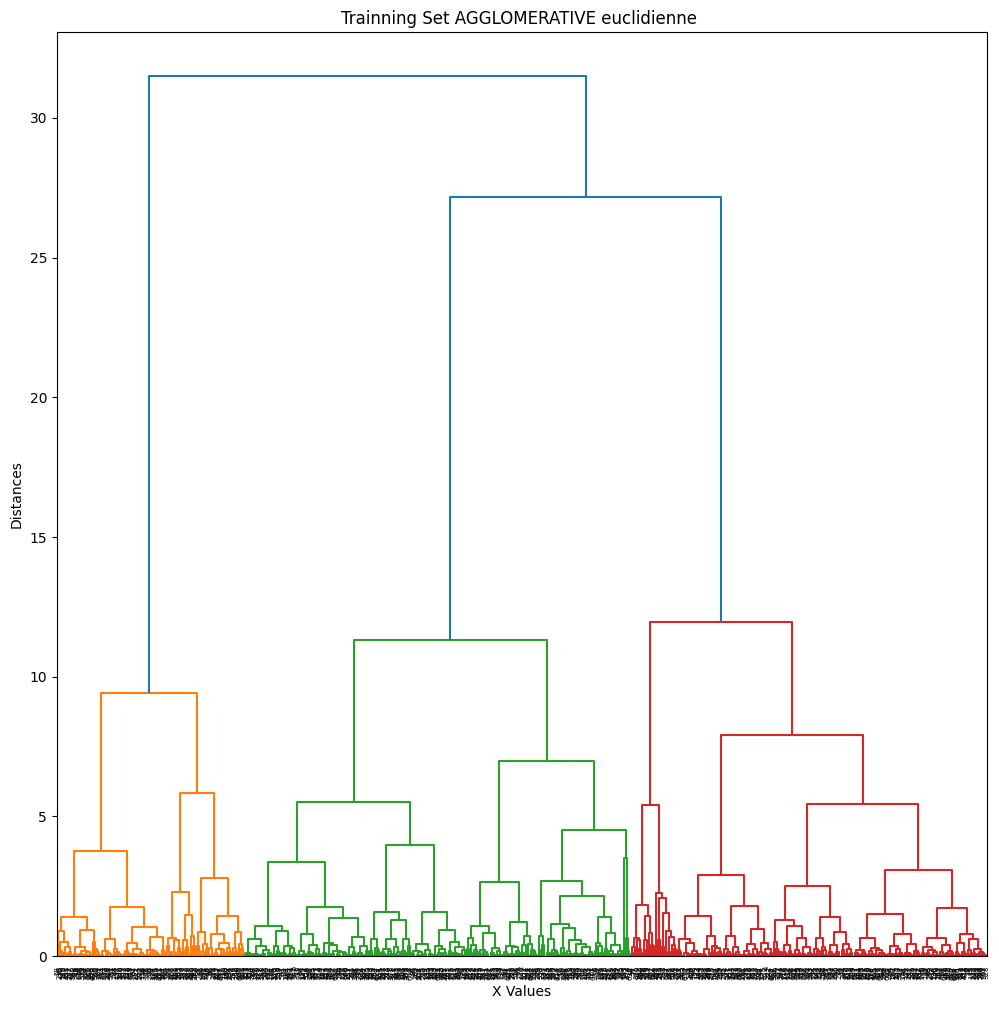

In [274]:
# dessiner le graphique hiérarchique pour l'ensemble de formation
plt.figure(figsize=(12,12)) # Créer une figure de taille 12x12 pouces

# Appliquer l'algorithme de linkage pour créer la matrice de liaison
# et dessiner le dendrogramme à partir de l'ensemble d'entraînement X_train
# méthode = 'average' (la distance moyenne entre tous les points des deux clusters)
dendrogram = sch.dendrogram(sch.linkage(X_train_scaler[:,:], method = 'ward')) # complete,average,single

# Ajouter un titre au graphique
plt.title('Trainning Set AGGLOMERATIVE euclidienne ') # Titre du dendrogramme

# Étiqueter l'axe des x
plt.xlabel('X Values') # Étiquette de l'axe des abscisses

# Étiqueter l'axe des y
plt.ylabel('Distances')# Étiquette de l'axe des ordonnées (représente les distances entre clusters)

# Afficher le graphique
plt.show()# Affichage du dendrogramme

**AVEC LA DISTANCE COSINUS**

In [275]:
# Création d'un modèle de regroupement hiérarchique agglomératif (Agglomerative Clustering)
AggClusteringModel_cos = AgglomerativeClustering(n_clusters=5,metric="cosine", linkage="average")

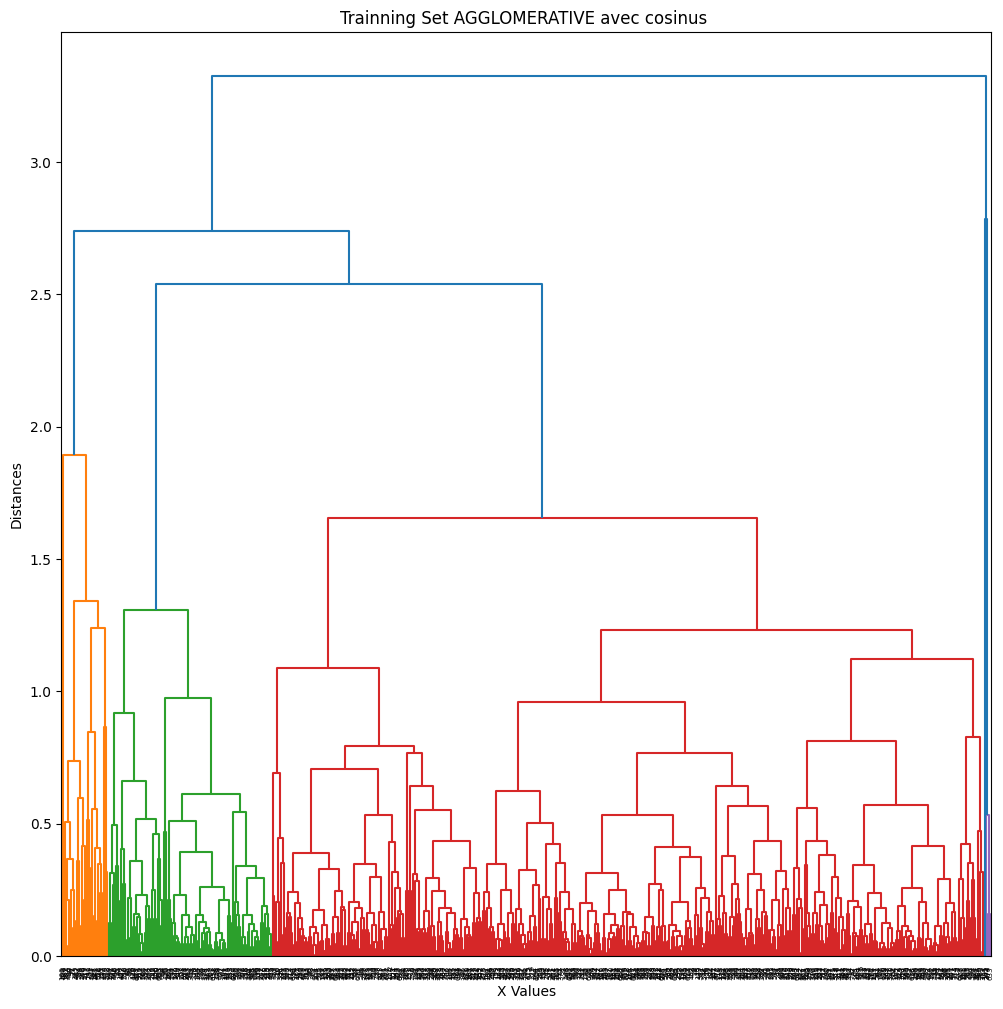

In [276]:
# Applique l’algorithme de regroupement hiérarchique (agglomératif) sur les données d’entraînement
# et prédit à quel groupe (cluster) appartient chaque échantillon de X_train
y_pred_train = AggClusteringModel_cos.fit_predict(X_train_scaler)

# dessiner le graphique hiérarchique pour l'ensemble de formation
plt.figure(figsize=(12,12)) # Créer une figure de taille 12x12 pouces

# Appliquer l'algorithme de linkage pour créer la matrice de liaison
# et dessiner le dendrogramme à partir de l'ensemble d'entraînement X_train
# méthode = 'average' (la distance moyenne entre tous les points des deux clusters)
dendrogram = sch.dendrogram(sch.linkage(X_train_scaler[:,:], method = "average")) # complete,average,single

# Ajouter un titre au graphique
plt.title("Trainning Set AGGLOMERATIVE avec cosinus ") # Titre du dendrogramme

# Étiqueter l'axe des x
plt.xlabel("X Values") # Étiquette de l'axe des abscisses

# Étiqueter l'axe des y
plt.ylabel("Distances")# Étiquette de l'axe des ordonnées (représente les distances entre clusters)

# Afficher le graphique
plt.show()# Affichage du dendrogramme



> **PCA SUR LES DONNEES DE TEST**







> **UTILISATION DE PCA**



In [277]:
# Importation de la classe PCA du module sklearn.decomposition
from sklearn.decomposition import PCA

# Création d'une instance de PCA pour réduire les données à 2 dimensions principales
pca = PCA(n_components=2)

# Réduction de la dimensionnalité des données d'entraînement à 2 composantes principales
X_pca_test = pca.fit_transform(X1_test)

# Normalisation des données réduites (centrage et réduction)
X_est_scaler = StandardScaler().fit_transform(X_pca_test)


> K**MEANS**


**KMEANS AVEC EUCLIDIENNE**

In [280]:
# Initialisation de l'algorithme KMeans avec 5 clusters (n_clusters=5)
kmean = KMeans(n_clusters= 5)

# Application de l'algorithme KMeans sur les données d'entraînement (X_train)
# pour obtenir les prédictions des clusters (y_pred_train)
y_pred_test = kmean.fit_predict(X_est_scaler)

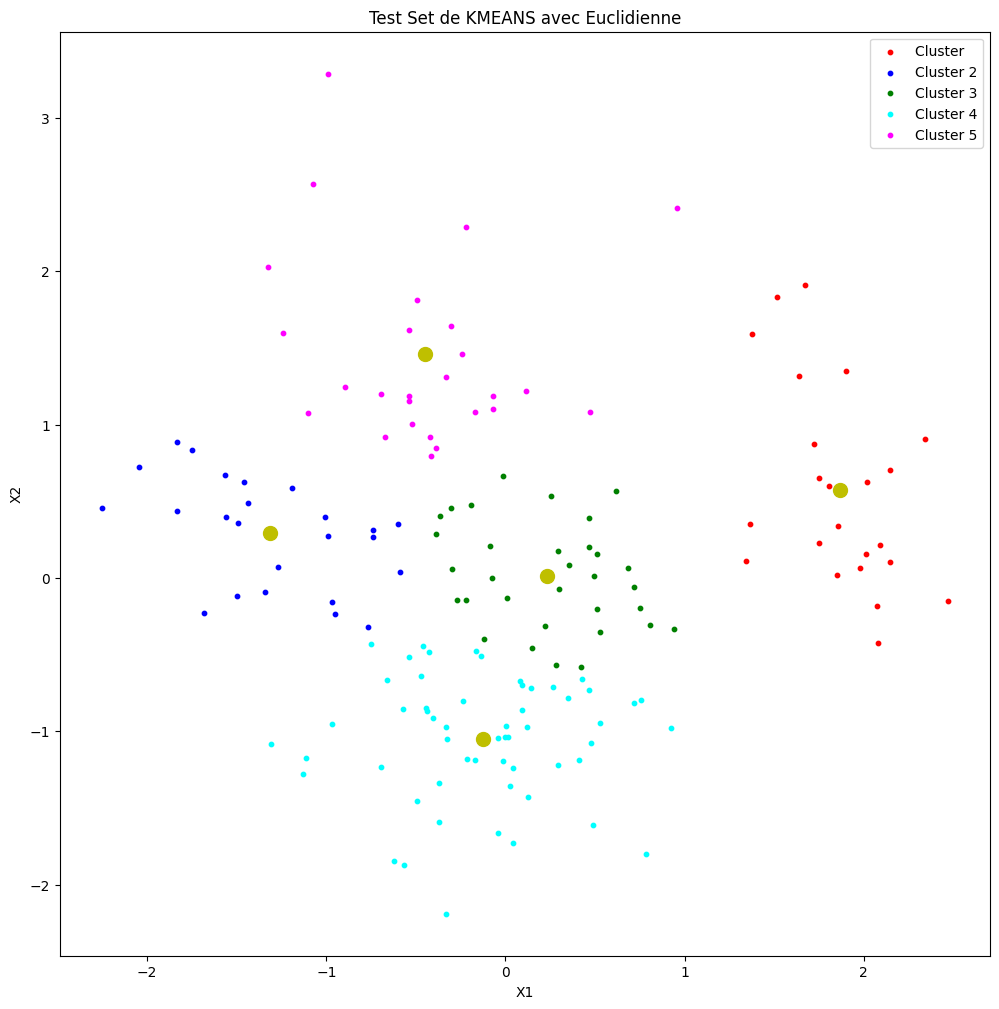

In [281]:
#draw the Scatter for Train set
# Création d'une figure de taille 12x12 pour le graphique
plt.figure(figsize=(12,12))

# Tracé des points du Cluster 1 (y_pred_train == 0) en rouge
plt.scatter(X_est_scaler[y_pred_test == 0, 0], X_est_scaler[y_pred_test == 0, 1], s = 10, c = "red", label = "Cluster ")

# Tracé des points du Cluster 2 (y_pred_train == 1) en bleu
plt.scatter(X_est_scaler[y_pred_test == 1, 0], X_est_scaler[y_pred_test == 1, 1], s = 10, c = "blue", label = "Cluster 2")

# Tracé des points du Cluster 3 (y_pred_train == 2) en vert
plt.scatter(X_est_scaler[y_pred_test == 2, 0],X_est_scaler[y_pred_test == 2, 1], s = 10, c = "green", label = "Cluster 3")

# Tracé des points du Cluster 4 (y_pred_train == 3) en cyan
plt.scatter(X_est_scaler[y_pred_test == 3, 0], X_est_scaler[y_pred_test == 3, 1], s = 10, c = "cyan", label = "Cluster 4")

# Tracé des points du Cluster 5 (y_pred_train == 4) en magenta
plt.scatter(X_est_scaler[y_pred_test == 4, 0], X_est_scaler[y_pred_test == 4, 1], s = 10, c = "magenta", label = "Cluster 5")

# Tracé des centres des clusters (kmean.cluster_centers_) en jaune avec une taille de point de 100
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = "y")

# Titre du graphique
plt.title("Test Set de KMEANS avec Euclidienne")

# Étiquette de l'axe X
plt.xlabel("X1")

# Étiquette de l'axe Y
plt.ylabel("X2")

# Affichage de la légende pour les clusters et les centres
plt.legend()

# Affichage du graphique
plt.show()

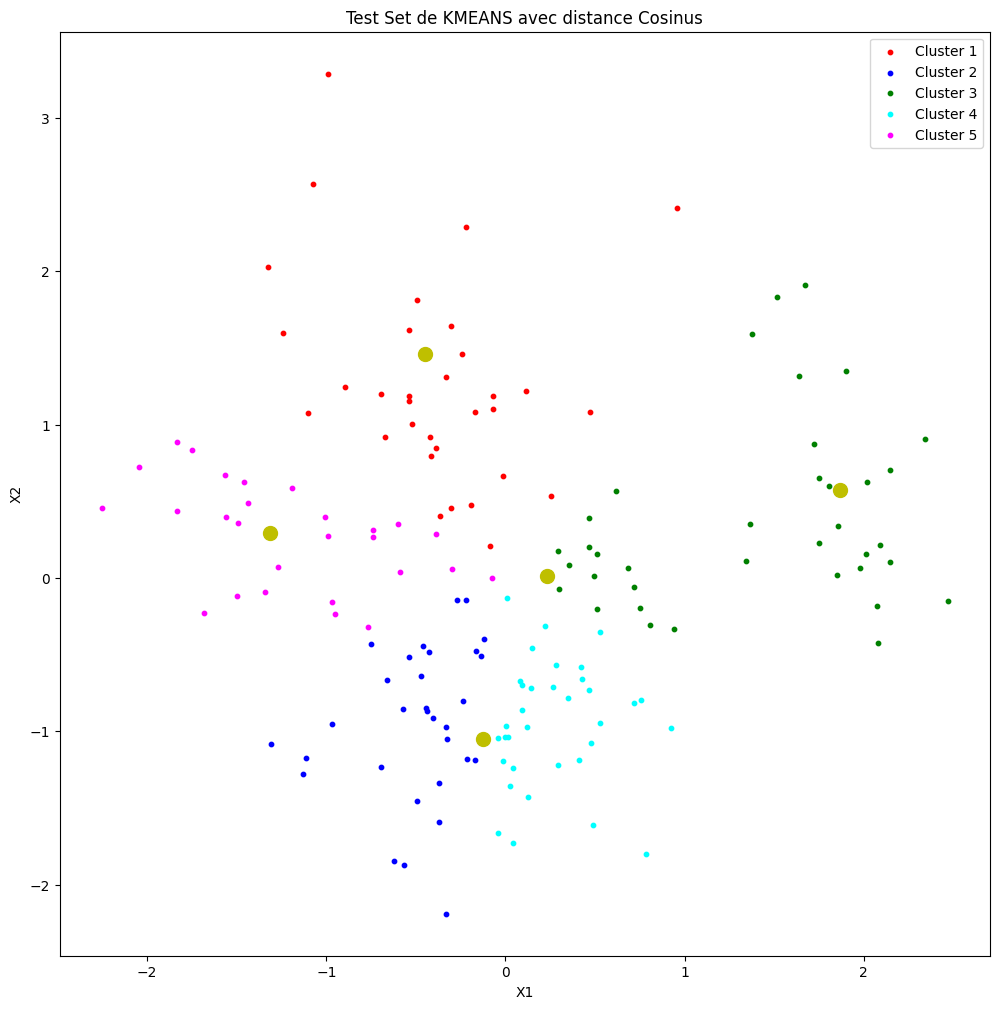

In [282]:
# Utilisation de KMeansCosine
kmeans_cosine = KMeansCosine(n_clusters=5)
kmeans_cosine.fit(X_est_scaler)

# Prédictions pour les données d'entraînement
y_pred_test_cosine = kmeans_cosine.predict(X_est_scaler)

#draw the Scatter for Train set
# Création d'une figure de taille 12x12 pour le graphique
plt.figure(figsize=(12,12))

# Tracé des points du Cluster 1 (y_pred_train == 0) en rouge
plt.scatter(X_est_scaler[y_pred_test_cosine == 0, 0], X_est_scaler[y_pred_test_cosine == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Tracé des points du Cluster 2 (y_pred_train == 1) en bleu
plt.scatter(X_est_scaler[y_pred_test_cosine == 1, 0], X_est_scaler[y_pred_test_cosine == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

# Tracé des points du Cluster 3 (y_pred_train == 2) en vert
plt.scatter(X_est_scaler[y_pred_test_cosine == 2, 0], X_est_scaler[y_pred_test_cosine == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# Tracé des points du Cluster 4 (y_pred_train == 3) en cyan
plt.scatter(X_est_scaler[y_pred_test_cosine == 3, 0], X_est_scaler[y_pred_test_cosine == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# Tracé des points du Cluster 5 (y_pred_train == 4) en magenta
plt.scatter(X_est_scaler[y_pred_test_cosine == 4, 0], X_est_scaler[y_pred_test_cosine == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')

# Tracé des centres des clusters (kmean.cluster_centers_) en jaune avec une taille de point de 100
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'y')

# Titre du graphique
plt.title('Test Set de KMEANS avec distance Cosinus')

# Étiquette de l'axe X
plt.xlabel('X1')

# Étiquette de l'axe Y
plt.ylabel('X2')

# Affichage de la légende pour les clusters et les centres
plt.legend()

# Affichage du graphique
plt.show()



> **AGGLOMERATIVE**



**AVEC EUCLIDIENNE**

In [283]:
# Création d'un modèle de regroupement hiérarchique agglomératif (Agglomerative Clustering)
AggClusteringModel_eud_test = AgglomerativeClustering(n_clusters=5,metric='euclidean', linkage='ward')

In [284]:
# Applique l’algorithme de regroupement hiérarchique (agglomératif) sur les données d’entraînement
# et prédit à quel groupe (cluster) appartient chaque échantillon de X_train
y_pred_test = AggClusteringModel_eud_test.fit_predict(X_est_scaler)

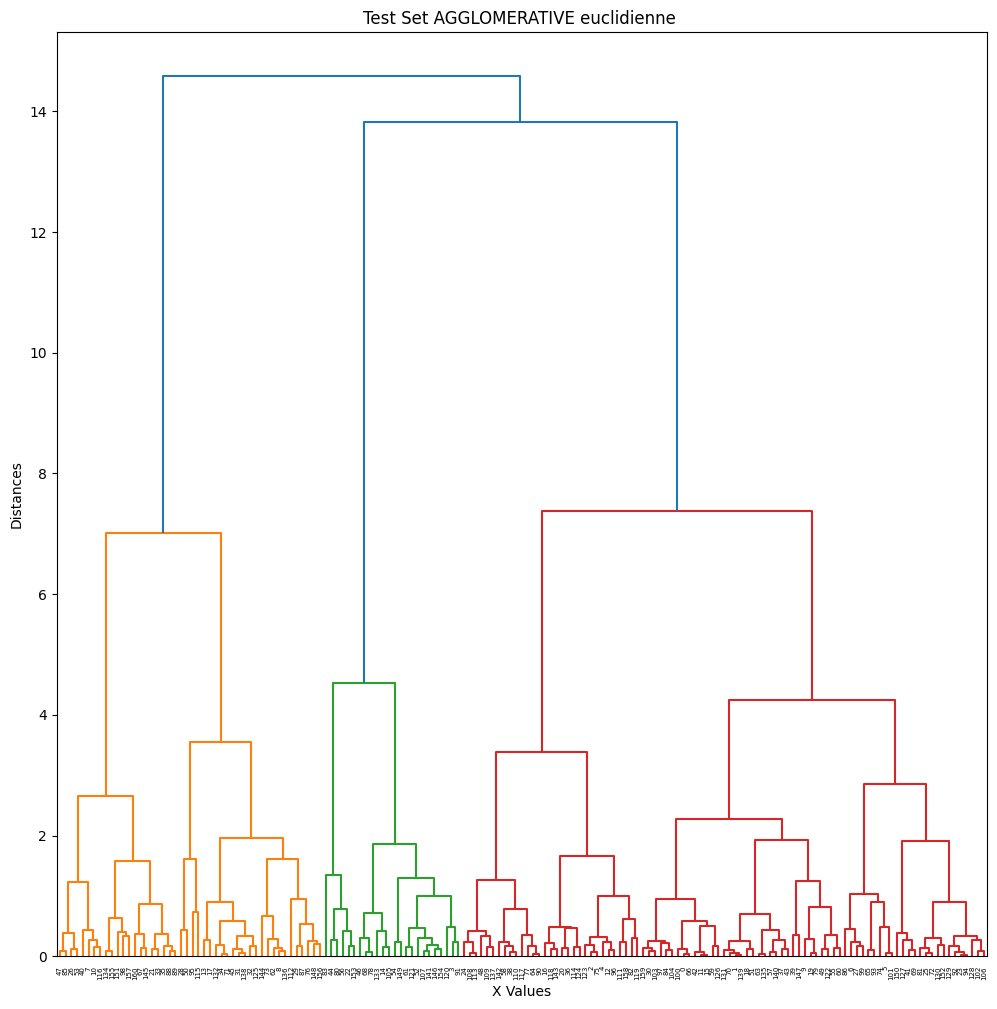

In [285]:
# dessiner le graphique hiérarchique pour l'ensemble de formation
plt.figure(figsize=(12,12)) # Créer une figure de taille 12x12 pouces

# Appliquer l'algorithme de linkage pour créer la matrice de liaison
# et dessiner le dendrogramme à partir de l'ensemble d'entraînement X_train
# méthode = 'average' (la distance moyenne entre tous les points des deux clusters)
dendrogram = sch.dendrogram(sch.linkage(X_est_scaler[:,:], method = 'ward')) # complete,average,single

# Ajouter un titre au graphique
plt.title('Test Set AGGLOMERATIVE euclidienne ') # Titre du dendrogramme

# Étiqueter l'axe des x
plt.xlabel('X Values') # Étiquette de l'axe des abscisses

# Étiqueter l'axe des y
plt.ylabel('Distances')# Étiquette de l'axe des ordonnées (représente les distances entre clusters)

# Afficher le graphique
plt.show()# Affichage du dendrogramme

**AVEC LE COSINUS**

In [286]:
# Création d'un modèle de regroupement hiérarchique agglomératif (Agglomerative Clustering)
AggClusteringModel_eud = AgglomerativeClustering(n_clusters=5,metric='euclidean', linkage='ward')

In [287]:
# Applique l’algorithme de regroupement hiérarchique (agglomératif) sur les données d’entraînement
# et prédit à quel groupe (cluster) appartient chaque échantillon de X_train
y_pred_train = AggClusteringModel_eud.fit_predict(X_est_scaler)

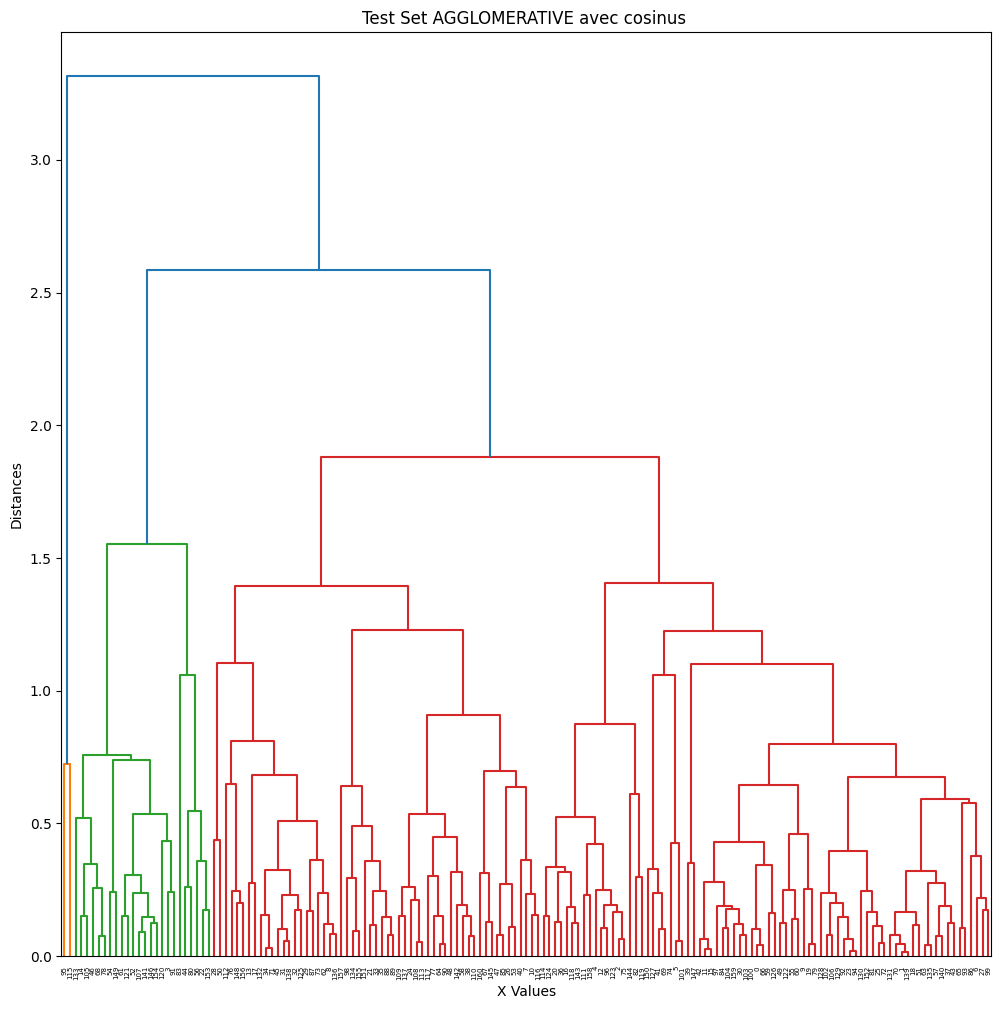

In [288]:
# Applique l’algorithme de regroupement hiérarchique (agglomératif) sur les données d’entraînement
# et prédit à quel groupe (cluster) appartient chaque échantillon de X_train
y_pred_test = AggClusteringModel_cos.fit_predict(X_est_scaler)

# dessiner le graphique hiérarchique pour l'ensemble de formation
plt.figure(figsize=(12,12)) # Créer une figure de taille 12x12 pouces

# Appliquer l'algorithme de linkage pour créer la matrice de liaison
# et dessiner le dendrogramme à partir de l'ensemble d'entraînement X_train
# méthode = 'average' (la distance moyenne entre tous les points des deux clusters)
dendrogram = sch.dendrogram(sch.linkage(X[:,:], method = "average")) # complete,average,single

# Ajouter un titre au graphique
plt.title("Test Set AGGLOMERATIVE avec cosinus ") # Titre du dendrogramme

# Étiqueter l'axe des x
plt.xlabel("X Values") # Étiquette de l'axe des abscisses

# Étiqueter l'axe des y
plt.ylabel("Distances")# Étiquette de l'axe des ordonnées (représente les distances entre clusters)

# Afficher le graphique
plt.show()# Affichage du dendrogramme

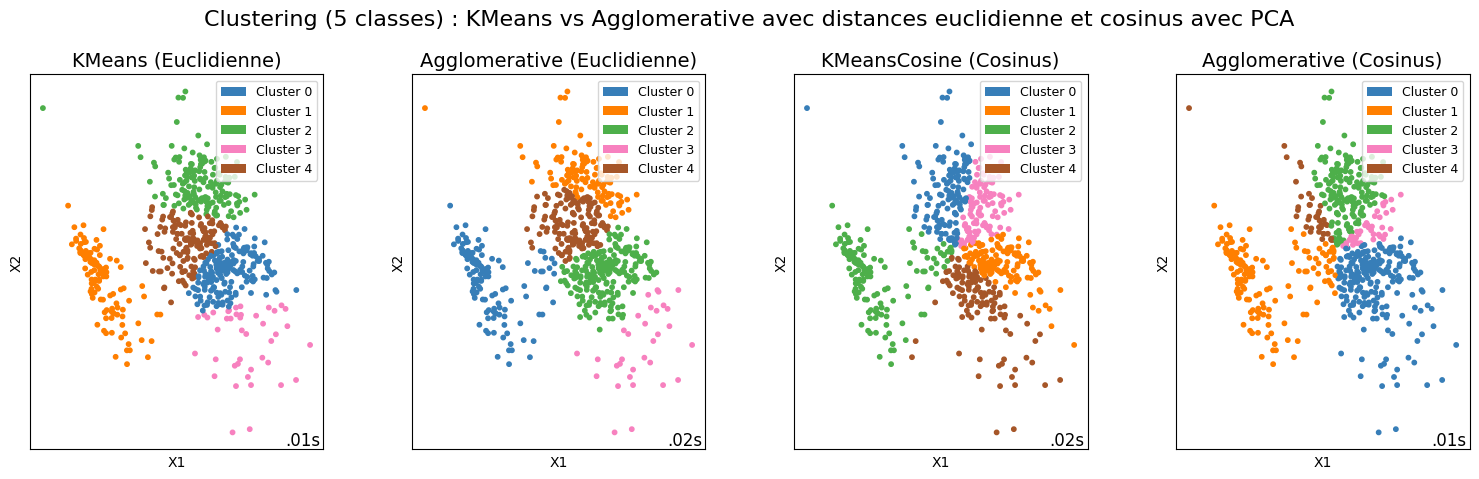

In [293]:
# Importation de la classe PCA du module sklearn.decomposition
from sklearn.decomposition import PCA

# Création d'une instance de PCA pour réduire les données à 2 dimensions principales
pca = PCA(n_components=2)

# Réduction de la dimensionnalité des données d'entraînement à 2 composantes principales
X_pca = pca.fit_transform(X1_train)

# Normalisation des données réduites (centrage et réduction)
X = StandardScaler().fit_transform(X_pca)

# Définition du nombre de clusters à détecter
n_clusters1 = 5

# Configuration de la figure pour afficher les résultats des différents algorithmes de clustering
plt.figure(figsize=(16, 5))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.85, wspace=0.3)

# Liste des algorithmes de clustering avec leurs configurations (euclidienne et cosinus)
clustering_algorithms = [
    ("KMeans (Euclidienne)", KMeans(n_clusters=n_clusters1, random_state=170)),
    ("Agglomerative (Euclidienne)", AgglomerativeClustering(n_clusters=n_clusters1, linkage="ward")),
    ("KMeansCosine (Cosinus)", KMeansCosine(n_clusters=5)),  # Utilise la distance cosinus
    ("Agglomerative (Cosinus)", AgglomerativeClustering(n_clusters=n_clusters1, metric="cosine", linkage="average"))
]

# Boucle pour appliquer chaque algorithme de clustering
for i, (name, algorithm) in enumerate(clustering_algorithms):
    t0 = time.time()  # Début du chronométrage

    # Vérification si l'algorithme utilise la distance cosinus
    if "Cosine" in name:
        if isinstance(algorithm, AgglomerativeClustering):
            # Pour Agglomerative Clustering avec cosinus, on applique directement l'algo
            algorithm.fit(X)
        else:
            # Pour KMeans avec cosinus, normalisation des vecteurs à norme 1
            X_cosine = X / np.linalg.norm(X, axis=1, keepdims=True)
            algorithm.fit(X_cosine)
    else:
        # Application directe pour les distances euclidiennes
        algorithm.fit(X)

    t1 = time.time()  # Fin du chronométrage

    # Récupération des étiquettes de cluster
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)

    # Création d’un sous-graphique pour l’algorithme courant
    plt.subplot(1, 4, i+1)
    plt.title(name, size=14)

    # Définition des couleurs pour chaque cluster (10 couleurs + noir pour les outliers éventuels)
    colors = np.array(list(islice(cycle([
        "#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628",
        "#984ea3", "#999999", "#e41a1c", "#dede00", "#00CED1"
    ]), int(max(y_pred) + 1))))
    colors = np.append(colors, ["#000000"])  # Couleur noire pour les points hors-cluster

    # Affichage des points, colorés selon leur cluster
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    # Création des légendes pour chaque cluster
    legend_elements = [Patch(facecolor=colors[k], label=f"Cluster {k}") for k in np.unique(y_pred)]
    plt.legend(handles=legend_elements, loc="upper right", fontsize=9, frameon=True)

    # Suppression des ticks des axes
    plt.xticks(())
    plt.yticks(())

    # Affichage du temps d'exécution de l'algorithme
    plt.text(0.99, 0.01, ("%.2fs" % (t1 - t0)).lstrip("0"),
             transform=plt.gca().transAxes, size=12, ha="right")

    # Étiquettes des axes
    plt.xlabel("X1")
    plt.ylabel("X2")

# Titre général de la figure
plt.suptitle("Clustering (5 classes) : KMeans vs Agglomerative avec distances euclidienne et cosinus avec PCA", fontsize=16)

# Affichage de la figure
plt.show()
